# Diabetes Analysis

### Author: Ly Duc Trung

### Link: https://github.com/DucTrung1802/DS/blob/main/GLM_Report/diabetes_analysis_upgrade.ipynb

### Dataset Link: https://www.archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators

## 0. Install and import libraries

### 0.1. Check R version

In [489]:
R.Version()

$platform
[1] "x86_64-w64-mingw32"

$arch
[1] "x86_64"

$os
[1] "mingw32"

$system
[1] "x86_64, mingw32"

$status
[1] ""

$major
[1] "4"

$minor
[1] "0.5"

$year
[1] "2021"

$month
[1] "03"

$day
[1] "31"

$`svn rev`
[1] "80133"

$language
[1] "R"

$version.string
[1] "R version 4.0.5 (2021-03-31)"

$nickname
[1] "Shake and Throw"

### 0.2. Install

In [490]:
# INSTALL THESE PACKAGES IN CONDA TERMINAL


### 0.3. Import

In [491]:
library(ggplot2)
library(ROSE)
library(psych)
library(DescTools)
library(BSDA)
library(gmodels)
library(rcompanion)
library(pcaPP)
library(corrplot)
library(caret)
library(MASS)
library(pROC)
library(DHARMa)

In [492]:
### 0.4. Constants

In [493]:
SEED = 123
MAIN_COLOR = "#1155cc"

## 1. Import Data

In [494]:
input_data = read.csv("diabetes_full_data.csv")

In [495]:
df = data.frame(input_data)

In [496]:
df

X,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,⋯,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,1,1,1,40,1,0,0,0,0,⋯,0,5,18,15,1,0,9,4,3,0
1,0,0,0,25,1,0,0,1,0,⋯,1,3,0,0,0,0,7,6,1,0
2,1,1,1,28,0,0,0,0,1,⋯,1,5,30,30,1,0,9,4,8,0
3,1,0,1,27,0,0,0,1,1,⋯,0,2,0,0,0,0,11,3,6,0
4,1,1,1,24,0,0,0,1,1,⋯,0,2,3,0,0,0,11,5,4,0
5,1,1,1,25,1,0,0,1,1,⋯,0,2,0,2,0,1,10,6,8,0
6,1,0,1,30,1,0,0,0,0,⋯,0,3,0,14,0,0,9,6,7,0
7,1,1,1,25,1,0,0,1,0,⋯,0,3,0,0,1,0,11,4,4,0
8,1,1,1,30,1,0,1,0,1,⋯,0,5,30,30,1,0,9,5,1,1


In [497]:
str(df)

'data.frame':	253680 obs. of  23 variables:
 $ X                   : int  0 1 2 3 4 5 6 7 8 9 ...
 $ HighBP              : int  1 0 1 1 1 1 1 1 1 0 ...
 $ HighChol            : int  1 0 1 0 1 1 0 1 1 0 ...
 $ CholCheck           : int  1 0 1 1 1 1 1 1 1 1 ...
 $ BMI                 : int  40 25 28 27 24 25 30 25 30 24 ...
 $ Smoker              : int  1 1 0 0 0 1 1 1 1 0 ...
 $ Stroke              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ HeartDiseaseorAttack: int  0 0 0 0 0 0 0 0 1 0 ...
 $ PhysActivity        : int  0 1 0 1 1 1 0 1 0 0 ...
 $ Fruits              : int  0 0 1 1 1 1 0 0 1 0 ...
 $ Veggies             : int  1 0 0 1 1 1 0 1 1 1 ...
 $ HvyAlcoholConsump   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ AnyHealthcare       : int  1 0 1 1 1 1 1 1 1 1 ...
 $ NoDocbcCost         : int  0 1 1 0 0 0 0 0 0 0 ...
 $ GenHlth             : int  5 3 5 2 2 2 3 3 5 2 ...
 $ MentHlth            : int  18 0 30 0 3 0 0 0 30 0 ...
 $ PhysHlth            : int  15 0 30 0 0 2 14 0 30 0 ...
 $ DiffWalk          

## 2. Data Preprocessing

### 2.1. Standardize column names

In [498]:
colnames(df)

[1] "X"                    "HighBP"               "HighChol"            
 [4] "CholCheck"            "BMI"                  "Smoker"              
 [7] "Stroke"               "HeartDiseaseorAttack" "PhysActivity"        
[10] "Fruits"               "Veggies"              "HvyAlcoholConsump"   
[13] "AnyHealthcare"        "NoDocbcCost"          "GenHlth"             
[16] "MentHlth"             "PhysHlth"             "DiffWalk"            
[19] "Sex"                  "Age"                  "Education"           
[22] "Income"               "Diabetes_binary"

In [499]:
# COMMENT: remove column "X"
if ("X" %in% colnames(df))
{
    df = df[, !colnames(df) == "X"]
}

In [500]:
str(df)

'data.frame':	253680 obs. of  22 variables:
 $ HighBP              : int  1 0 1 1 1 1 1 1 1 0 ...
 $ HighChol            : int  1 0 1 0 1 1 0 1 1 0 ...
 $ CholCheck           : int  1 0 1 1 1 1 1 1 1 1 ...
 $ BMI                 : int  40 25 28 27 24 25 30 25 30 24 ...
 $ Smoker              : int  1 1 0 0 0 1 1 1 1 0 ...
 $ Stroke              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ HeartDiseaseorAttack: int  0 0 0 0 0 0 0 0 1 0 ...
 $ PhysActivity        : int  0 1 0 1 1 1 0 1 0 0 ...
 $ Fruits              : int  0 0 1 1 1 1 0 0 1 0 ...
 $ Veggies             : int  1 0 0 1 1 1 0 1 1 1 ...
 $ HvyAlcoholConsump   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ AnyHealthcare       : int  1 0 1 1 1 1 1 1 1 1 ...
 $ NoDocbcCost         : int  0 1 1 0 0 0 0 0 0 0 ...
 $ GenHlth             : int  5 3 5 2 2 2 3 3 5 2 ...
 $ MentHlth            : int  18 0 30 0 3 0 0 0 30 0 ...
 $ PhysHlth            : int  15 0 30 0 0 2 14 0 30 0 ...
 $ DiffWalk            : int  1 0 1 0 0 0 0 1 1 0 ...
 $ Sex               

### 2.2. Mismatched data types

In [501]:
str(df)

'data.frame':	253680 obs. of  22 variables:
 $ HighBP              : int  1 0 1 1 1 1 1 1 1 0 ...
 $ HighChol            : int  1 0 1 0 1 1 0 1 1 0 ...
 $ CholCheck           : int  1 0 1 1 1 1 1 1 1 1 ...
 $ BMI                 : int  40 25 28 27 24 25 30 25 30 24 ...
 $ Smoker              : int  1 1 0 0 0 1 1 1 1 0 ...
 $ Stroke              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ HeartDiseaseorAttack: int  0 0 0 0 0 0 0 0 1 0 ...
 $ PhysActivity        : int  0 1 0 1 1 1 0 1 0 0 ...
 $ Fruits              : int  0 0 1 1 1 1 0 0 1 0 ...
 $ Veggies             : int  1 0 0 1 1 1 0 1 1 1 ...
 $ HvyAlcoholConsump   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ AnyHealthcare       : int  1 0 1 1 1 1 1 1 1 1 ...
 $ NoDocbcCost         : int  0 1 1 0 0 0 0 0 0 0 ...
 $ GenHlth             : int  5 3 5 2 2 2 3 3 5 2 ...
 $ MentHlth            : int  18 0 30 0 3 0 0 0 30 0 ...
 $ PhysHlth            : int  15 0 30 0 0 2 14 0 30 0 ...
 $ DiffWalk            : int  1 0 1 0 0 0 0 1 1 0 ...
 $ Sex               

In [502]:
# COMMENT
# All columns have correct data type

### 2.3. Mixed data values

In [503]:
# COMMENT
# Example: (female, woman, man, male) => (male, female)

In [504]:
# COMMENT
# This dataset contains only number data => No mixed data values

### 2.4. Missing data

#### 2.4.1 Null data

In [505]:
sum(is.na(df))

[1] 0

In [506]:
# COMMENT
# This dataset has no missing values

#### 2.4.2 Missing data in specific columns

In [507]:
# COMMENT
# We see that in column "Age", the value could have value of 14 
# which is Don’t know / Refused / Missing (_AGEG5YR - BRFSS)

In [508]:
nrow(subset(df, Age == 14))

[1] 0

In [509]:
# COMMENT
# The dataset has no missing data.

## 3. Exploratory data analysis (EDA)

In [510]:
plot_stack_bar_2x2 = function(table_2x2)
{
    barplot(table_2x2, beside = TRUE, col = c("green", "red"))
    legend("top", legend = rownames(table_2x2), fill = c("green", "red"))
}

In [511]:
str(df)

'data.frame':	253680 obs. of  22 variables:
 $ HighBP              : int  1 0 1 1 1 1 1 1 1 0 ...
 $ HighChol            : int  1 0 1 0 1 1 0 1 1 0 ...
 $ CholCheck           : int  1 0 1 1 1 1 1 1 1 1 ...
 $ BMI                 : int  40 25 28 27 24 25 30 25 30 24 ...
 $ Smoker              : int  1 1 0 0 0 1 1 1 1 0 ...
 $ Stroke              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ HeartDiseaseorAttack: int  0 0 0 0 0 0 0 0 1 0 ...
 $ PhysActivity        : int  0 1 0 1 1 1 0 1 0 0 ...
 $ Fruits              : int  0 0 1 1 1 1 0 0 1 0 ...
 $ Veggies             : int  1 0 0 1 1 1 0 1 1 1 ...
 $ HvyAlcoholConsump   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ AnyHealthcare       : int  1 0 1 1 1 1 1 1 1 1 ...
 $ NoDocbcCost         : int  0 1 1 0 0 0 0 0 0 0 ...
 $ GenHlth             : int  5 3 5 2 2 2 3 3 5 2 ...
 $ MentHlth            : int  18 0 30 0 3 0 0 0 30 0 ...
 $ PhysHlth            : int  15 0 30 0 0 2 14 0 30 0 ...
 $ DiffWalk            : int  1 0 1 0 0 0 0 1 1 0 ...
 $ Sex               

### 3.1. Response variable analysis

In [512]:
plot_binary_distribution = function(dataframe, response_col, title)
{
    # Creating a table of counts for each category in the response column
    response_table <- table(dataframe[, response_col])
    
    # Converting the table into a data frame
    response_df <- as.data.frame(response_table)
    
    # Renaming the column
    colnames(response_df) <- c("Response", "Count")
    
    # Calculate percentages
    response_df$Percent <- response_df$Count / sum(response_df$Count) * 100
    
    # Creating a pie chart using ggplot2
    pie_chart <- ggplot(response_df, aes(x = "", y = Count, fill = Response)) +
      geom_bar(stat = "identity", width = 1) +
      coord_polar("y", start = 0) +
      scale_fill_manual(values = c("green", "red")) + 
      labs(title = title) +
      theme_void() +
      theme(legend.position = "bottom", 
            plot.title = element_text(hjust = 0.5, size = 30),  # Adjust title size here
            legend.text = element_text(size = 20)) +            # Adjust legend text size here
      geom_text(aes(label = paste0(round(Percent, 1), "%")), 
                position = position_stack(vjust = 0.5),
                size = 7) + # Adjust label size here
      guides(fill = guide_legend(title = response_col, title.position = "top", title.theme = element_text(size = 15))) # Adjust legend title size here
    
    # Displaying the pie chart
    print(pie_chart)
}

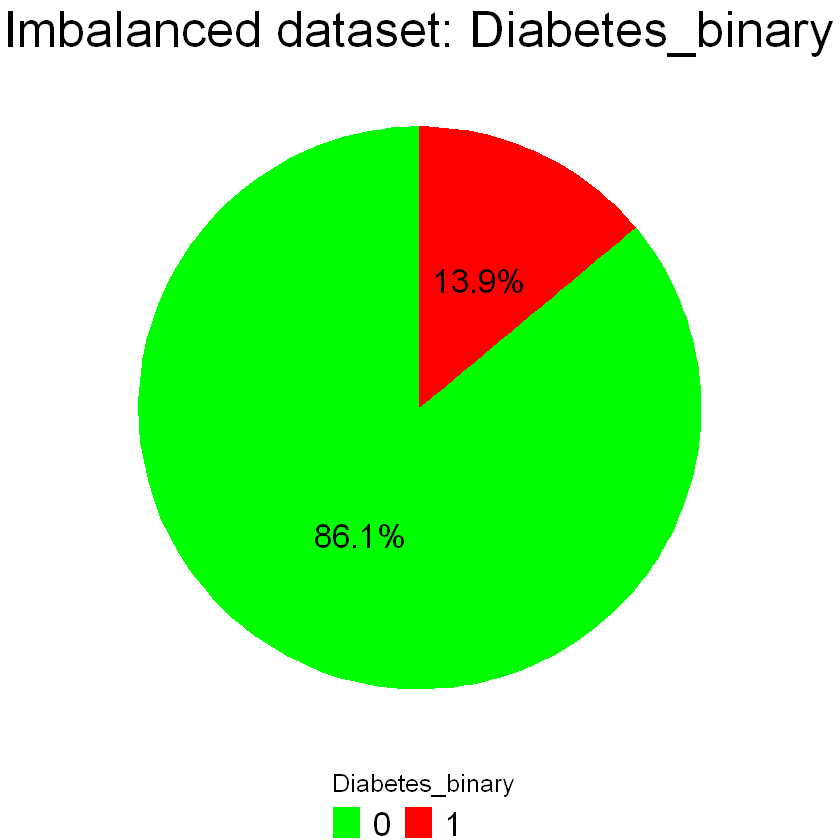

In [513]:
plot_binary_distribution(df, "Diabetes_binary", "Imbalanced dataset: Diabetes_binary")

In [514]:
# COMMENT
# The dataset is imbalanced
# => Apply oversampling method

### 3.2. Dataset oversampling

In [515]:
index = caret::createDataPartition(df$Diabetes_binary, p = 0.8, list = FALSE)
training_data = df[index, ]
testing_data = df[-index, ]

nrow(training_data)
nrow(testing_data)
nrow(training_data[training_data$Diabetes_binary == 1, ]) / nrow(training_data)
nrow(testing_data[testing_data$Diabetes_binary == 1, ]) / nrow(testing_data)

[1] 202944

[1] 50736

[1] 0.1388462

[1] 0.1412804

### 3.3. Training dataset oversampling

In [516]:
table(training_data$Diabetes_binary)


     0      1 
174766  28178 

In [517]:
balanced_training_data <- ovun.sample(Diabetes_binary ~  ., data = training_data,
                                  p = 0.5, seed = SEED, 
                                  method = "over")$data

In [518]:
table(balanced_training_data$Diabetes_binary)


     0      1 
174766 174600 

In [519]:
balanced_training_data

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,⋯,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,1,1,40,1,0,0,0,0,1,⋯,0,5,18,15,1,0,9,4,3,0
2,0,0,0,25,1,0,0,1,0,0,⋯,1,3,0,0,0,0,7,6,1,0
3,1,1,1,28,0,0,0,0,1,0,⋯,1,5,30,30,1,0,9,4,8,0
4,1,0,1,27,0,0,0,1,1,1,⋯,0,2,0,0,0,0,11,3,6,0
5,1,1,1,24,0,0,0,1,1,1,⋯,0,2,3,0,0,0,11,5,4,0
6,1,1,1,25,1,0,0,1,1,1,⋯,0,2,0,2,0,1,10,6,8,0
7,1,0,1,30,1,0,0,0,0,0,⋯,0,3,0,14,0,0,9,6,7,0
8,1,1,1,25,1,0,0,1,0,1,⋯,0,3,0,0,1,0,11,4,4,0
9,0,0,1,24,0,0,0,0,0,1,⋯,0,2,0,0,0,1,8,4,3,0


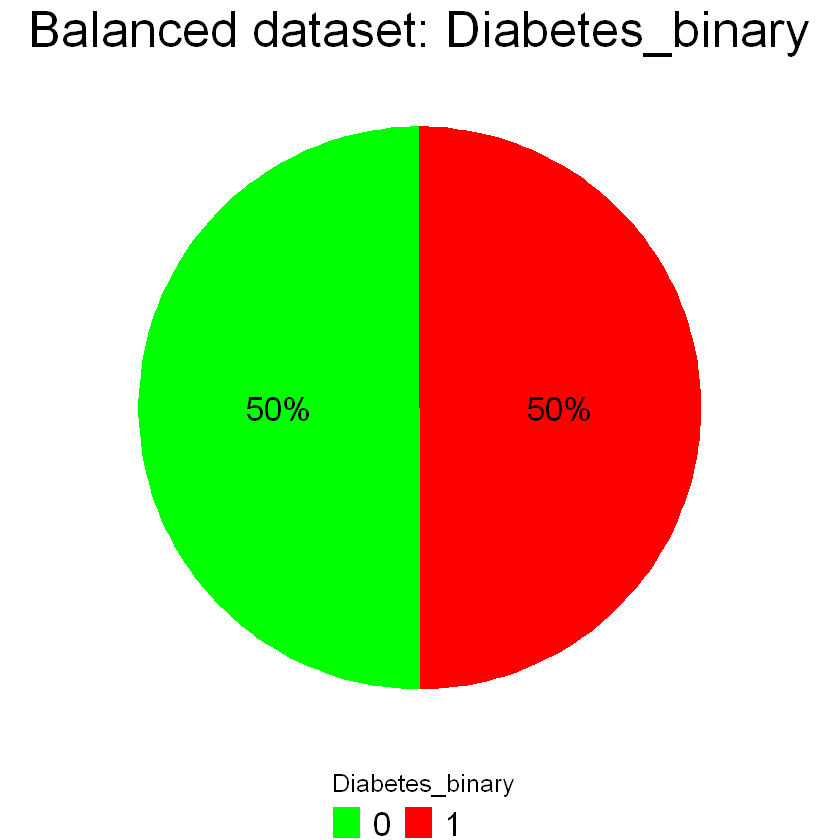

In [520]:
plot_binary_distribution(balanced_training_data, "Diabetes_binary", "Balanced dataset: Diabetes_binary")

In [521]:
with_diabetes_rows = which(balanced_training_data$Diabetes_binary == 1)
no_diabetes_rows = which(balanced_training_data$Diabetes_binary == 0)

### 3.3. Detect Numerical, Binary, Ordinal variables

In [522]:
str(balanced_training_data)

'data.frame':	349366 obs. of  22 variables:
 $ HighBP              : int  1 0 1 1 1 1 1 1 0 0 ...
 $ HighChol            : int  1 0 1 0 1 1 0 1 0 0 ...
 $ CholCheck           : int  1 0 1 1 1 1 1 1 1 1 ...
 $ BMI                 : int  40 25 28 27 24 25 30 25 24 26 ...
 $ Smoker              : int  1 1 0 0 0 1 1 1 0 1 ...
 $ Stroke              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ HeartDiseaseorAttack: int  0 0 0 0 0 0 0 0 0 0 ...
 $ PhysActivity        : int  0 1 0 1 1 1 0 1 0 0 ...
 $ Fruits              : int  0 0 1 1 1 1 0 0 0 0 ...
 $ Veggies             : int  1 0 0 1 1 1 0 1 1 1 ...
 $ HvyAlcoholConsump   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ AnyHealthcare       : int  1 0 1 1 1 1 1 1 1 1 ...
 $ NoDocbcCost         : int  0 1 1 0 0 0 0 0 0 0 ...
 $ GenHlth             : int  5 3 5 2 2 2 3 3 2 3 ...
 $ MentHlth            : int  18 0 30 0 3 0 0 0 0 0 ...
 $ PhysHlth            : int  15 0 30 0 0 2 14 0 0 15 ...
 $ DiffWalk            : int  1 0 1 0 0 0 0 1 0 0 ...
 $ Sex                

In [523]:
numerical_cols = c("BMI", "MentHlth", "PhysHlth")
binary_cols = c("HighBP", "HighChol", "CholCheck", "Smoker", "Stroke",
               "HeartDiseaseorAttack", "PhysActivity", "Fruits", "Veggies",
               "HvyAlcoholConsump", "AnyHealthcare", "NoDocbcCost",
               "DiffWalk", "Sex")
ordinal_cols = c("GenHlth", "Age", "Education", "Income")
response_col = "Diabetes_binary"

display_matrix = matrix(c(length(numerical_cols), length(binary_cols), length(ordinal_cols)), nrow = 3)
rownames(display_matrix) = c("numerical_cols", "binary_cols", "ordinal_cols")
colnames(display_matrix) = "Number of variable"
display_matrix

,Number of variable
numerical_cols,3
binary_cols,14
ordinal_cols,4


### 3.4. Data factorization

In [524]:
# Training data factorization
for (col in binary_cols)
{
    balanced_training_data[, col] = factor(balanced_training_data[, col])
}

for (col in ordinal_cols)
{
    balanced_training_data[, col] = factor(balanced_training_data[, col], ordered = T)
}

balanced_training_data[, response_col] = factor(balanced_training_data[, response_col])

In [525]:
# Testing data factorization
for (col in binary_cols)
{
    testing_data[, col] = factor(testing_data[, col])
}

for (col in ordinal_cols)
{
    testing_data[, col] = factor(testing_data[, col], ordered = T)
}

testing_data[, response_col] = factor(testing_data[, response_col])

In [526]:
str(balanced_training_data)

'data.frame':	349366 obs. of  22 variables:
 $ HighBP              : Factor w/ 2 levels "0","1": 2 1 2 2 2 2 2 2 1 1 ...
 $ HighChol            : Factor w/ 2 levels "0","1": 2 1 2 1 2 2 1 2 1 1 ...
 $ CholCheck           : Factor w/ 2 levels "0","1": 2 1 2 2 2 2 2 2 2 2 ...
 $ BMI                 : int  40 25 28 27 24 25 30 25 24 26 ...
 $ Smoker              : Factor w/ 2 levels "0","1": 2 2 1 1 1 2 2 2 1 2 ...
 $ Stroke              : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ HeartDiseaseorAttack: Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ PhysActivity        : Factor w/ 2 levels "0","1": 1 2 1 2 2 2 1 2 1 1 ...
 $ Fruits              : Factor w/ 2 levels "0","1": 1 1 2 2 2 2 1 1 1 1 ...
 $ Veggies             : Factor w/ 2 levels "0","1": 2 1 1 2 2 2 1 2 2 2 ...
 $ HvyAlcoholConsump   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ AnyHealthcare       : Factor w/ 2 levels "0","1": 2 1 2 2 2 2 2 2 2 2 ...
 $ NoDocbcCost         : Factor w/ 2 levels "

In [527]:
str(testing_data)

'data.frame':	50736 obs. of  22 variables:
 $ HighBP              : Factor w/ 2 levels "0","1": 2 2 1 1 2 1 1 2 2 2 ...
 $ HighChol            : Factor w/ 2 levels "0","1": 2 2 1 1 2 2 1 1 1 2 ...
 $ CholCheck           : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 2 ...
 $ BMI                 : int  34 28 23 32 37 31 23 26 31 37 ...
 $ Smoker              : Factor w/ 2 levels "0","1": 2 1 2 1 2 2 1 1 1 1 ...
 $ Stroke              : Factor w/ 2 levels "0","1": 1 1 1 1 2 1 1 1 1 1 ...
 $ HeartDiseaseorAttack: Factor w/ 2 levels "0","1": 1 1 1 1 2 1 1 1 1 1 ...
 $ PhysActivity        : Factor w/ 2 levels "0","1": 1 1 2 2 1 2 2 2 1 2 ...
 $ Fruits              : Factor w/ 2 levels "0","1": 2 1 1 2 1 2 2 2 2 2 ...
 $ Veggies             : Factor w/ 2 levels "0","1": 2 2 1 2 2 2 2 2 1 2 ...
 $ HvyAlcoholConsump   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ AnyHealthcare       : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 2 ...
 $ NoDocbcCost         : Factor w/ 2 levels "0

### 3.4. Numerical variables analysis

In [528]:
get_correlation = function(dataframe, col_1, col_2, numerical_cols, binary_cols, ordinal_cols, response_col)
{
    if (col_1 %in% ordinal_cols || col_2 %in% ordinal_cols)
    {
        return (pcaPP::cor.fk(dataframe[,col_1], dataframe[,col_2]))
    }
    else if (col_1 %in% numerical_cols && col_2 %in% c(binary_cols, response_col) ||
             col_1 %in% c(binary_cols, response_col) && col_2 %in% numerical_cols)
    {
        return (cor.test(as.numeric(dataframe[,col_1]), as.numeric(dataframe[,col_2]))$estimate)
    }
    else if (col_1 %in% c(binary_cols, response_col) && col_2 %in% c(binary_cols, response_col))
    {
        return (rcompanion::cramerV(table(dataframe[ ,c(col_1, col_2)])))
    }
    else if (col_1 %in% numerical_cols && col_2 %in% numerical_cols)
    {
        return (cor(dataframe[,col_1], dataframe[,col_2]))
    }
    else
    {
        return (0)
    }
}    

In [529]:
# Numerical variables (3): BMI, MentHlth, PhysHlth

In [530]:
psych::describeBy(balanced_training_data[,numerical_cols], balanced_training_data[,response_col])


 Descriptive statistics by group 
group: 0
         vars      n  mean   sd median trimmed  mad min max range skew kurtosis
BMI         1 174766 27.80 6.30     27   27.14 4.45  12  98    86 2.35    13.81
MentHlth    2 174766  2.98 7.12      0    0.94 0.00   0  30    30 2.86     7.35
PhysHlth    3 174766  3.64 8.06      0    1.31 0.00   0  30    30 2.49     5.00
           se
BMI      0.02
MentHlth 0.02
PhysHlth 0.02
------------------------------------------------------------ 
group: 1
         vars      n  mean    sd median trimmed  mad min max range skew
BMI         1 174600 31.95  7.40     31   31.23 5.93  13  98    85 1.53
MentHlth    2 174600  4.44  8.93      0    2.00 0.00   0  30    30 2.07
PhysHlth    3 174600  7.97 11.30      1    6.21 1.48   0  30    30 1.15
         kurtosis   se
BMI          5.64 0.02
MentHlth     2.90 0.02
PhysHlth    -0.34 0.03

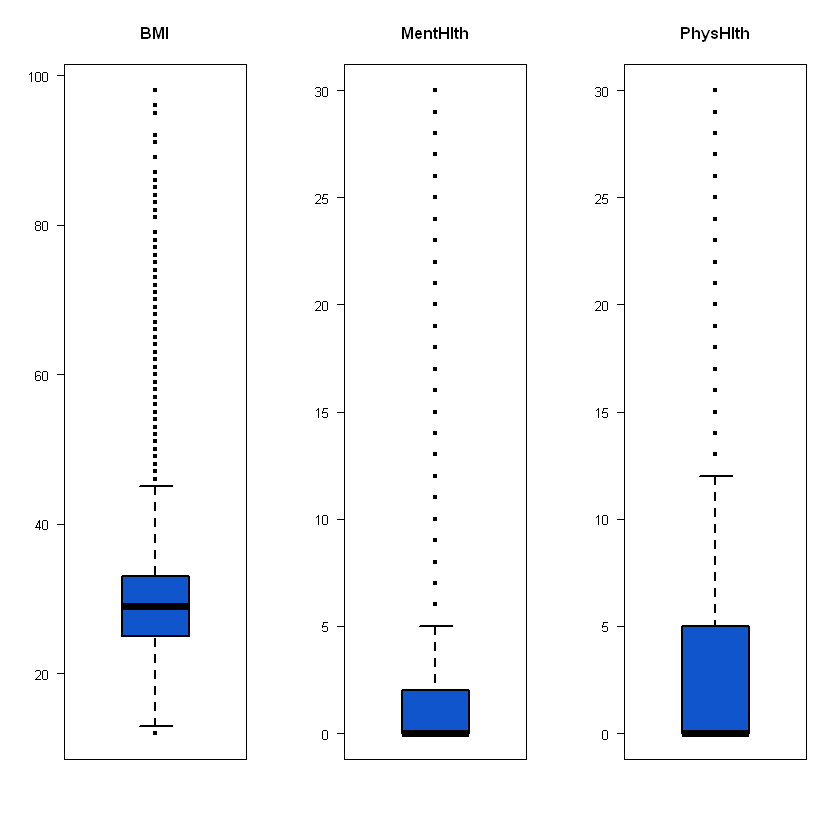

In [531]:
par(mfrow = c(1,3))
boxplot(balanced_training_data$BMI, main = "BMI", col = MAIN_COLOR, las = 1, lwd = 2)
boxplot(balanced_training_data$MentHlth, main = "MentHlth", col = MAIN_COLOR, las = 1, lwd = 2)
boxplot(balanced_training_data$PhysHlth, main = "PhysHlth", col = MAIN_COLOR, las = 1, lwd = 2)

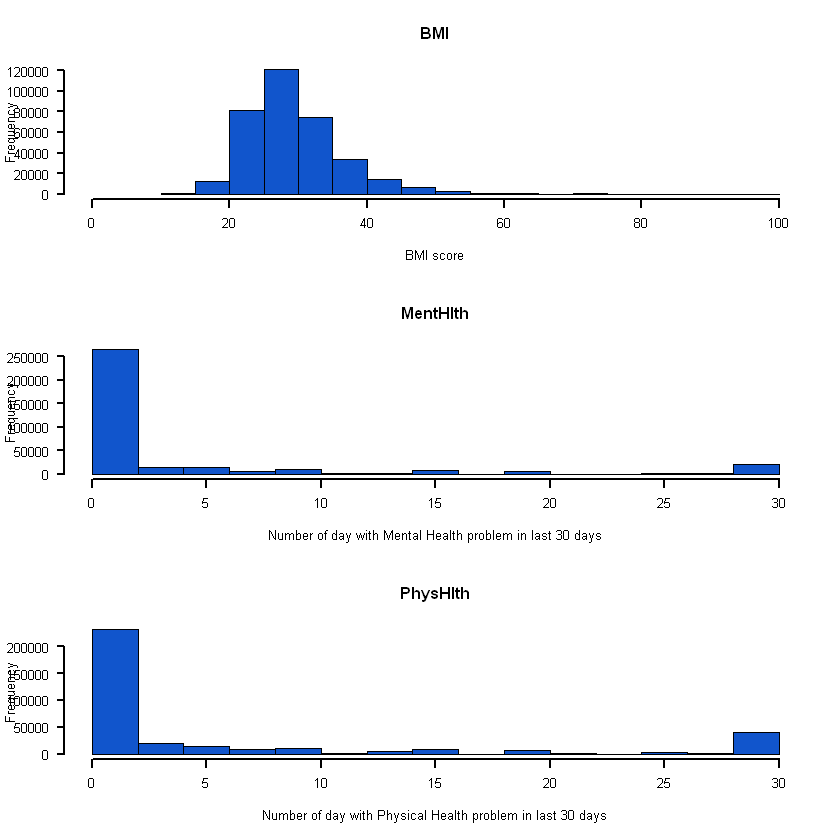

In [532]:
par(mfrow = c(3,1))
hist(balanced_training_data$BMI, main = "BMI", xlab = "BMI score", col = MAIN_COLOR, las = 1, lwd = 2, xlim = c(0, 100))
hist(balanced_training_data$MentHlth, main = "MentHlth", xlab = "Number of day with Mental Health problem in last 30 days",
    col = MAIN_COLOR, las = 1, lwd = 2)
hist(balanced_training_data$PhysHlth, main = "PhysHlth", xlab = "Number of day with Physical Health problem in last 30 days",
    col = MAIN_COLOR, las = 1, lwd = 2)

#### 3.4.1. BMI

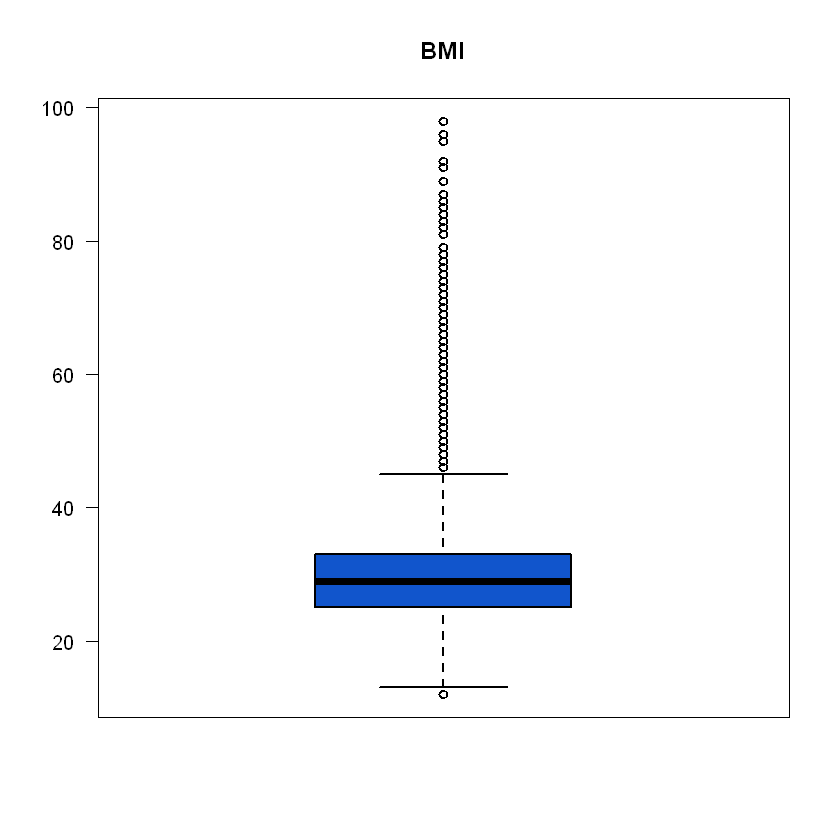

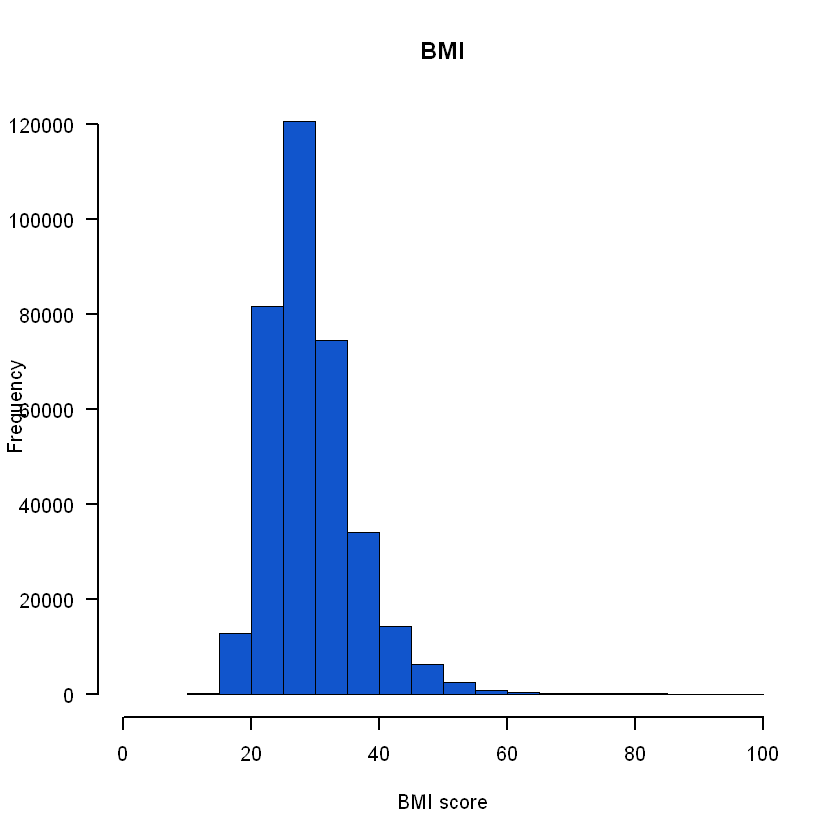

In [533]:
boxplot(balanced_training_data$BMI, main = "BMI", col = MAIN_COLOR, las = 1, lwd = 2)
hist(balanced_training_data$BMI, main = "BMI", xlab = "BMI score", col = MAIN_COLOR, las = 1, lwd = 2, xlim = c(0, 100))

In [534]:
get_correlation(balanced_training_data, "BMI", response_col, numerical_cols, binary_cols, ordinal_cols, response_col)

cor 
0.2892727

In [535]:
BMI_q1 = quantile(balanced_training_data$BMI, probs = 0.25, names = F)
BMI_q3 = quantile(balanced_training_data$BMI, probs = 0.75, names = F)
BMI_upper_quartile = BMI_q3 + 1.5 * (BMI_q3 - BMI_q1)
cat("Maximum value of boxplot BMI:", BMI_upper_quartile)

Maximum value of boxplot BMI: 45

#### Question: The percentage of diabetes people having BMI under 45 and over 45.

In [536]:
BMI_THRESH_HOLD = 45

In [537]:
BMI_table = table(ifelse(balanced_training_data$BMI > BMI_THRESH_HOLD, sprintf("BMI > %d", BMI_THRESH_HOLD), sprintf("BMI < %d", BMI_THRESH_HOLD)),
      ifelse(balanced_training_data$Diabetes_binary == 1, "diabetes", "no diabetes"))
BMI_table = BMI_table[, c(2, 1)]
BMI_table

          
           no diabetes diabetes
  BMI < 45      172264   166050
  BMI > 45        2502     8550

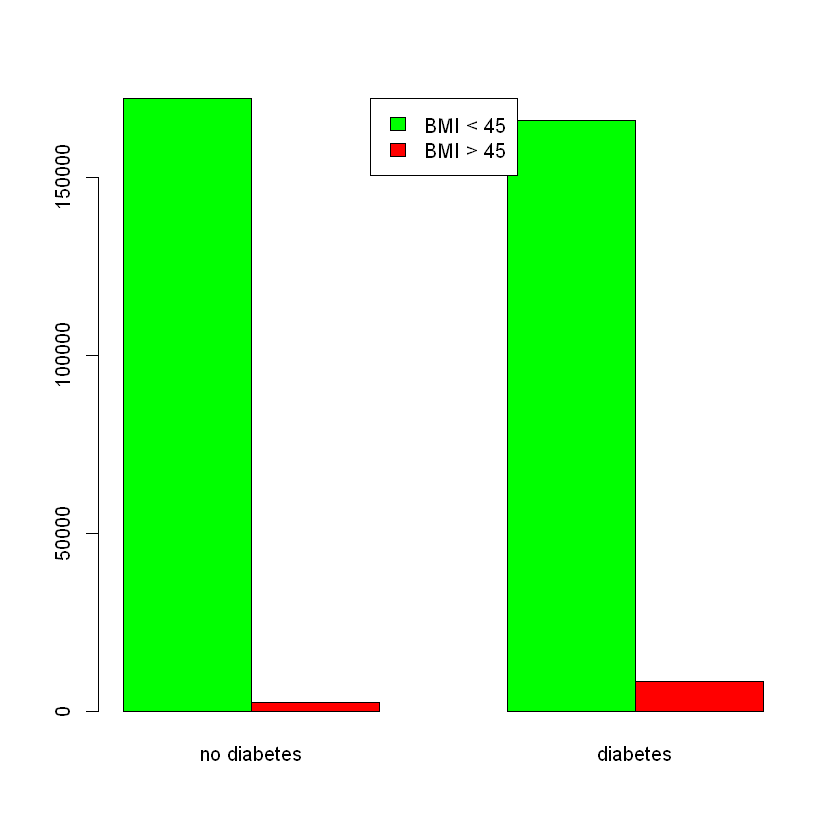

In [538]:
plot_stack_bar_2x2(BMI_table)

In [539]:
DescTools::OddsRatio(BMI_table, conf.level = 0.95)

odds ratio     lwr.ci     upr.ci 
  3.545149   3.388962   3.708534

In [540]:
# COMMENT
# odds ratio = 3.452 > 1
# People with BMI over 45 are 3.452 times more likely to have diabetes than others.
# => Create a binary variable that to distinguish people having BMI over 45.

In [541]:
if (!"BMI_over_45" %in% binary_cols)
{
    binary_cols = append(binary_cols, "BMI_over_45")
}

In [542]:
# Add new column for training data
new_column = factor(as.integer(ifelse(balanced_training_data$BMI > BMI_THRESH_HOLD, 1, 0)))
BMI_index = which(colnames(balanced_training_data) == "BMI")
balanced_training_data = cbind(balanced_training_data[,1:BMI_index], BMI_over_45 = new_column, balanced_training_data[,(BMI_index+1):ncol(balanced_training_data)])

In [543]:
str(balanced_training_data)

'data.frame':	349366 obs. of  23 variables:
 $ HighBP              : Factor w/ 2 levels "0","1": 2 1 2 2 2 2 2 2 1 1 ...
 $ HighChol            : Factor w/ 2 levels "0","1": 2 1 2 1 2 2 1 2 1 1 ...
 $ CholCheck           : Factor w/ 2 levels "0","1": 2 1 2 2 2 2 2 2 2 2 ...
 $ BMI                 : int  40 25 28 27 24 25 30 25 24 26 ...
 $ BMI_over_45         : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Smoker              : Factor w/ 2 levels "0","1": 2 2 1 1 1 2 2 2 1 2 ...
 $ Stroke              : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ HeartDiseaseorAttack: Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ PhysActivity        : Factor w/ 2 levels "0","1": 1 2 1 2 2 2 1 2 1 1 ...
 $ Fruits              : Factor w/ 2 levels "0","1": 1 1 2 2 2 2 1 1 1 1 ...
 $ Veggies             : Factor w/ 2 levels "0","1": 2 1 1 2 2 2 1 2 2 2 ...
 $ HvyAlcoholConsump   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ AnyHealthcare       : Factor w/ 2 levels "

In [544]:
get_correlation(balanced_training_data, "BMI_over_45", response_col, numerical_cols, binary_cols, ordinal_cols, response_col)

Cramer V 
 0.09899

In [545]:
# COMMENT
# Correlation of new explain variable: BMI_over_45 is lower than original explain variable
# => Eliminate this explain variable

In [546]:
balanced_training_data = subset(balanced_training_data, select = -BMI_over_45)
binary_cols = binary_cols[binary_cols != "BMI_over_45"]

In [547]:
str(balanced_training_data)

'data.frame':	349366 obs. of  22 variables:
 $ HighBP              : Factor w/ 2 levels "0","1": 2 1 2 2 2 2 2 2 1 1 ...
 $ HighChol            : Factor w/ 2 levels "0","1": 2 1 2 1 2 2 1 2 1 1 ...
 $ CholCheck           : Factor w/ 2 levels "0","1": 2 1 2 2 2 2 2 2 2 2 ...
 $ BMI                 : int  40 25 28 27 24 25 30 25 24 26 ...
 $ Smoker              : Factor w/ 2 levels "0","1": 2 2 1 1 1 2 2 2 1 2 ...
 $ Stroke              : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ HeartDiseaseorAttack: Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ PhysActivity        : Factor w/ 2 levels "0","1": 1 2 1 2 2 2 1 2 1 1 ...
 $ Fruits              : Factor w/ 2 levels "0","1": 1 1 2 2 2 2 1 1 1 1 ...
 $ Veggies             : Factor w/ 2 levels "0","1": 2 1 1 2 2 2 1 2 2 2 ...
 $ HvyAlcoholConsump   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ AnyHealthcare       : Factor w/ 2 levels "0","1": 2 1 2 2 2 2 2 2 2 2 ...
 $ NoDocbcCost         : Factor w/ 2 levels "

#### 3.4.2. MentHlth

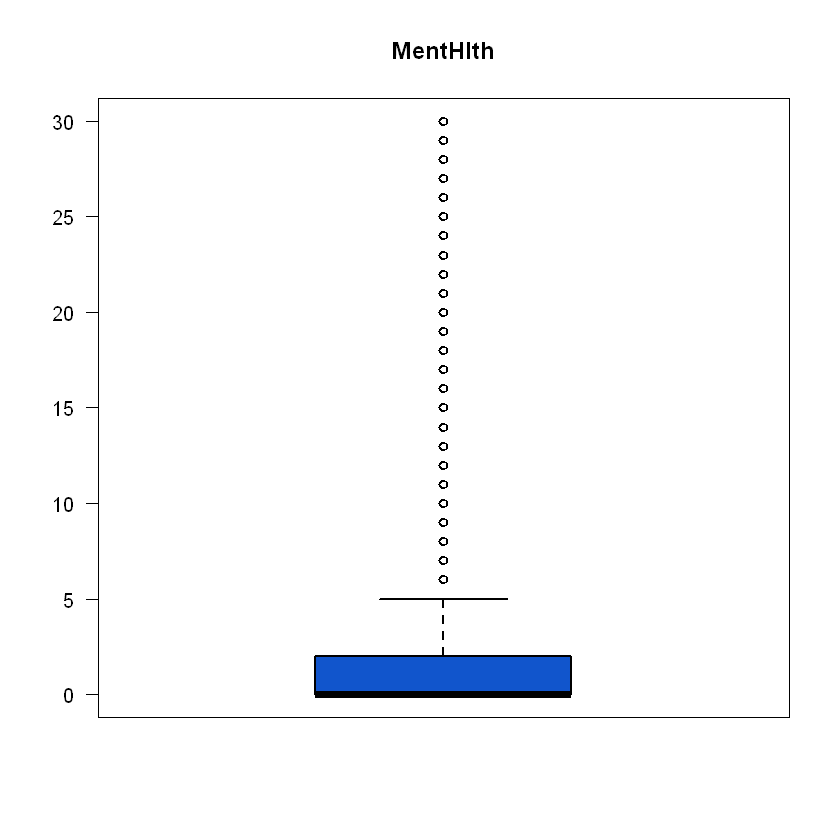

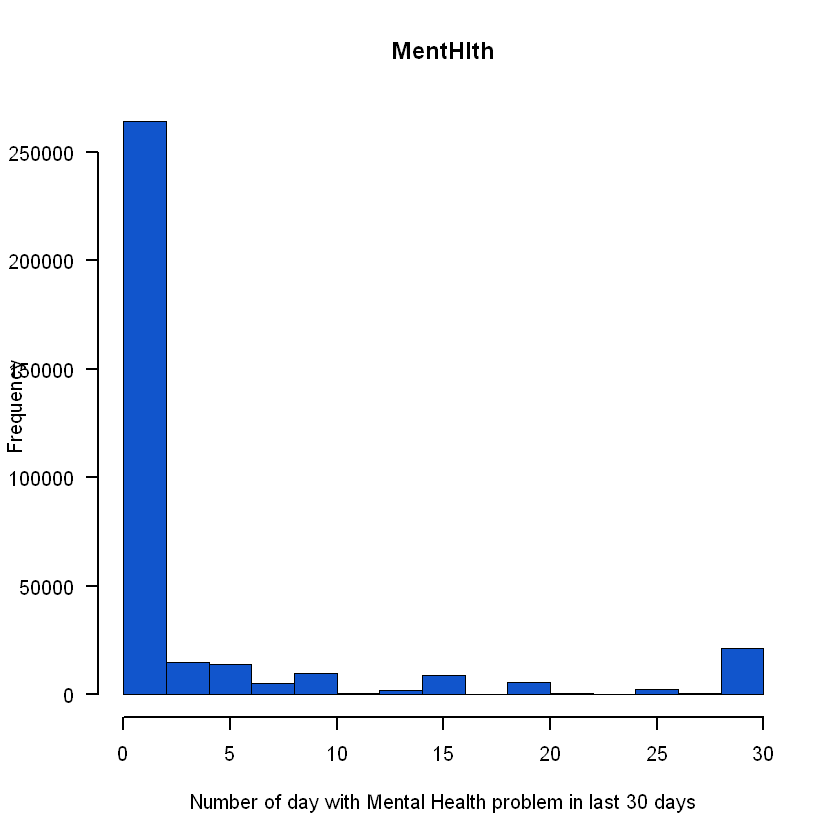

In [548]:
boxplot(balanced_training_data$MentHlth, main = "MentHlth", col = MAIN_COLOR, las = 1, lwd = 2)
hist(balanced_training_data$MentHlth, main = "MentHlth", xlab = "Number of day with Mental Health problem in last 30 days",
    col = MAIN_COLOR, las = 1, lwd = 2, xlim = c(0, 30))

#### Question: The percentage of diabetes people having MentHlth or not.

In [549]:
MentHlth_table = table(ifelse(balanced_training_data$MentHlth > 0, "have MentHlth", "no MentHlth"),
      ifelse(balanced_training_data$Diabetes_binary == 1, "diabetes", "no diabetes"))

In [550]:
MentHlth_table = Rev(MentHlth_table)

In [551]:
MentHlth_table

               
                no diabetes diabetes
  no MentHlth        121889   115919
  have MentHlth       52877    58681

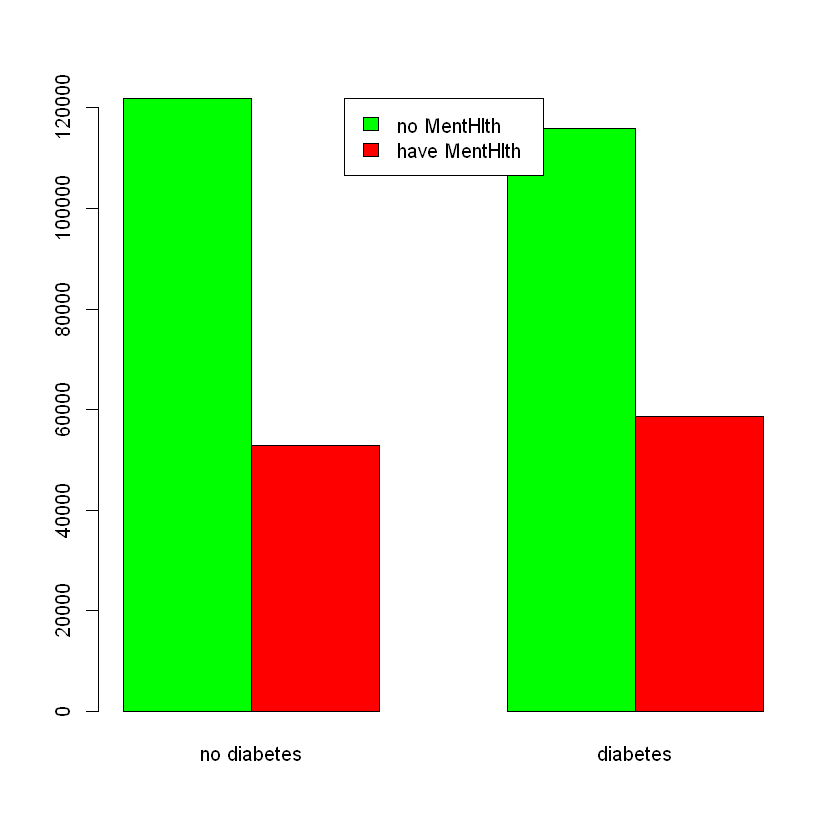

In [552]:
plot_stack_bar_2x2(MentHlth_table)

In [553]:
DescTools::OddsRatio(MentHlth_table, conf.level = 0.95)

odds ratio     lwr.ci     upr.ci 
  1.166919   1.150420   1.183654

In [554]:
# COMMENT
# odd ratio is close to 1
# => No creating new binary variable

#### 3.4.3. PhysHlth

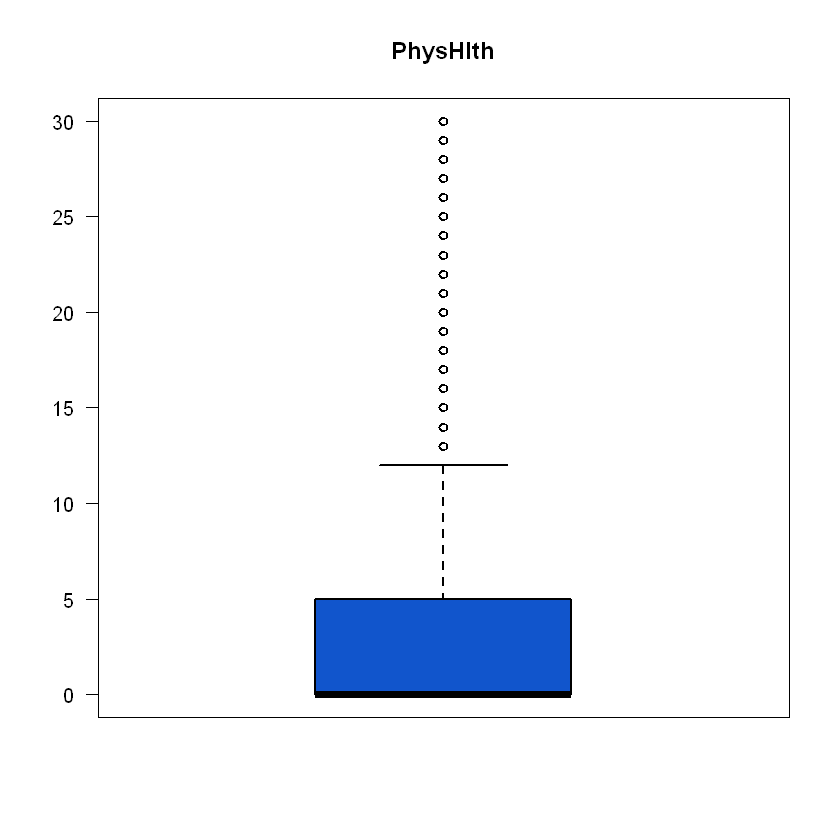

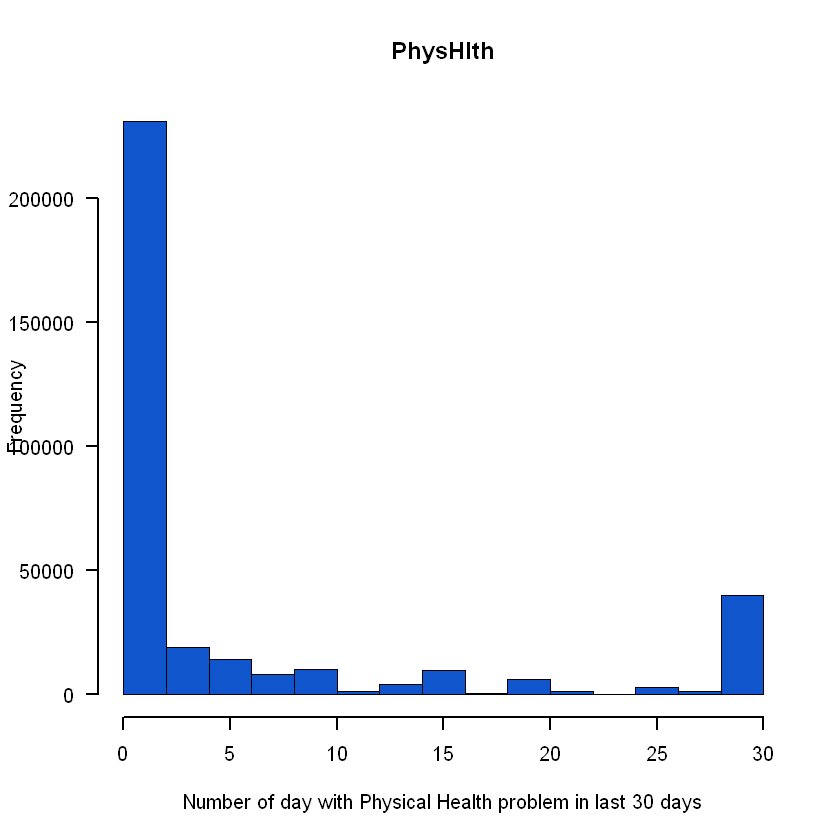

In [555]:
boxplot(balanced_training_data$PhysHlth, main = "PhysHlth", col = MAIN_COLOR, las = 1, lwd = 2)
hist(balanced_training_data$PhysHlth, main = "PhysHlth", xlab = "Number of day with Physical Health problem in last 30 days",
    col = MAIN_COLOR, las = 1, lwd = 2, xlim = c(0, 30))

In [556]:
get_correlation(balanced_training_data, "PhysHlth", response_col, numerical_cols, binary_cols, ordinal_cols, response_col)

cor 
0.2149508

#### Question: The percentage of diabetes people having PhysHlth or not.

In [557]:
PhysHlth_table = table(ifelse(balanced_training_data$PhysHlth > 0, "have PhysHlth", "no PhysHlth"),
      ifelse(balanced_training_data$Diabetes_binary == 1, "diabetes", "no diabetes"))

In [558]:
PhysHlth_table = Rev(PhysHlth_table)

In [559]:
PhysHlth_table

               
                no diabetes diabetes
  no PhysHlth        114630    82280
  have PhysHlth       60136    92320

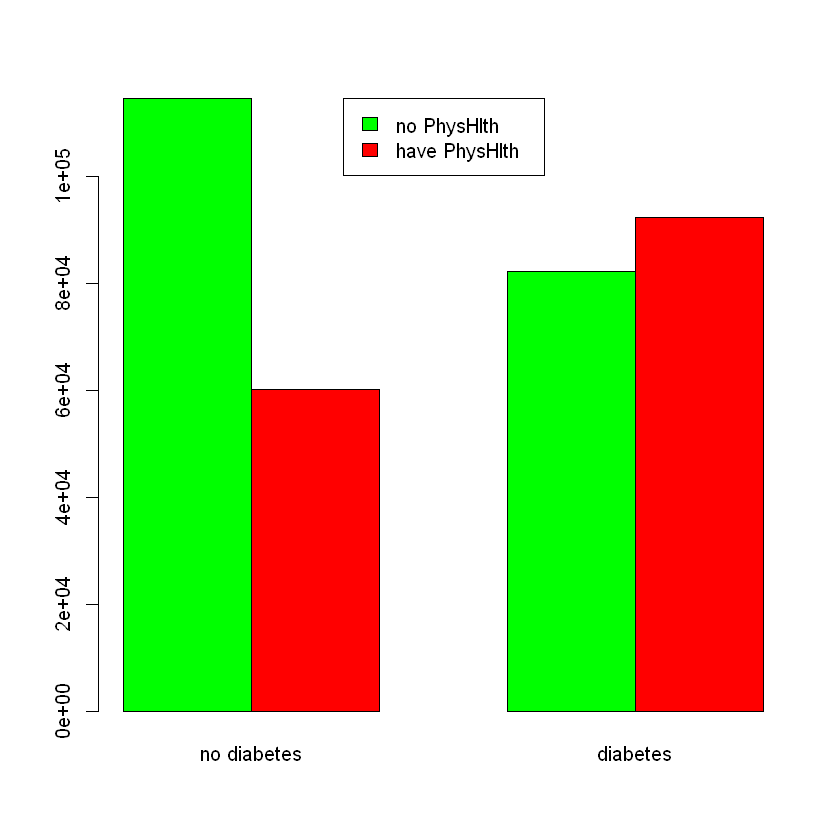

In [560]:
plot_stack_bar_2x2(PhysHlth_table)

In [561]:
OddsRatio(PhysHlth_table, conf.level = 0.95)

odds ratio     lwr.ci     upr.ci 
  2.138776   2.109829   2.168120

In [562]:
# odds ratio = 2.118 > 1
# People have PhysHlth are 2.118 times more likely to have diabetes than others.
# => Create a binary variable that to distinguish people having PhysHlth.

In [563]:
if (! "havePhysHlth" %in% binary_cols)
{
    binary_cols = append(binary_cols, "havePhysHlth")
}

In [564]:
# Add new column for training data
new_column = factor(as.integer(ifelse(balanced_training_data$PhysHlth > 0, 1, 0)))
PhysHlth_index = which(colnames(balanced_training_data) == "PhysHlth")
balanced_training_data = cbind(balanced_training_data[,1:PhysHlth_index], havePhysHlth = new_column, balanced_training_data[,(PhysHlth_index+1):ncol(balanced_training_data)])

In [565]:
str(balanced_training_data)

'data.frame':	349366 obs. of  23 variables:
 $ HighBP              : Factor w/ 2 levels "0","1": 2 1 2 2 2 2 2 2 1 1 ...
 $ HighChol            : Factor w/ 2 levels "0","1": 2 1 2 1 2 2 1 2 1 1 ...
 $ CholCheck           : Factor w/ 2 levels "0","1": 2 1 2 2 2 2 2 2 2 2 ...
 $ BMI                 : int  40 25 28 27 24 25 30 25 24 26 ...
 $ Smoker              : Factor w/ 2 levels "0","1": 2 2 1 1 1 2 2 2 1 2 ...
 $ Stroke              : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ HeartDiseaseorAttack: Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ PhysActivity        : Factor w/ 2 levels "0","1": 1 2 1 2 2 2 1 2 1 1 ...
 $ Fruits              : Factor w/ 2 levels "0","1": 1 1 2 2 2 2 1 1 1 1 ...
 $ Veggies             : Factor w/ 2 levels "0","1": 2 1 1 2 2 2 1 2 2 2 ...
 $ HvyAlcoholConsump   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ AnyHealthcare       : Factor w/ 2 levels "0","1": 2 1 2 2 2 2 2 2 2 2 ...
 $ NoDocbcCost         : Factor w/ 2 levels "

In [566]:
get_correlation(balanced_training_data, "havePhysHlth", response_col, numerical_cols, binary_cols, ordinal_cols, response_col)

Cramer V 
  0.1862

In [567]:
# COMMENT
# Correlation of new explain variable: havePhysHlth is lower than original explain variable
# => Eliminate this explain variable

In [568]:
balanced_training_data = subset(balanced_training_data, select = -havePhysHlth)
binary_cols = binary_cols[binary_cols != "havePhysHlth"]

In [569]:
str(balanced_training_data)

'data.frame':	349366 obs. of  22 variables:
 $ HighBP              : Factor w/ 2 levels "0","1": 2 1 2 2 2 2 2 2 1 1 ...
 $ HighChol            : Factor w/ 2 levels "0","1": 2 1 2 1 2 2 1 2 1 1 ...
 $ CholCheck           : Factor w/ 2 levels "0","1": 2 1 2 2 2 2 2 2 2 2 ...
 $ BMI                 : int  40 25 28 27 24 25 30 25 24 26 ...
 $ Smoker              : Factor w/ 2 levels "0","1": 2 2 1 1 1 2 2 2 1 2 ...
 $ Stroke              : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ HeartDiseaseorAttack: Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ PhysActivity        : Factor w/ 2 levels "0","1": 1 2 1 2 2 2 1 2 1 1 ...
 $ Fruits              : Factor w/ 2 levels "0","1": 1 1 2 2 2 2 1 1 1 1 ...
 $ Veggies             : Factor w/ 2 levels "0","1": 2 1 1 2 2 2 1 2 2 2 ...
 $ HvyAlcoholConsump   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ AnyHealthcare       : Factor w/ 2 levels "0","1": 2 1 2 2 2 2 2 2 2 2 ...
 $ NoDocbcCost         : Factor w/ 2 levels "

### 3.5. Categorical - binary variables analysis

In [570]:
binary_cols

[1] "HighBP"               "HighChol"             "CholCheck"           
 [4] "Smoker"               "Stroke"               "HeartDiseaseorAttack"
 [7] "PhysActivity"         "Fruits"               "Veggies"             
[10] "HvyAlcoholConsump"    "AnyHealthcare"        "NoDocbcCost"         
[13] "DiffWalk"             "Sex"

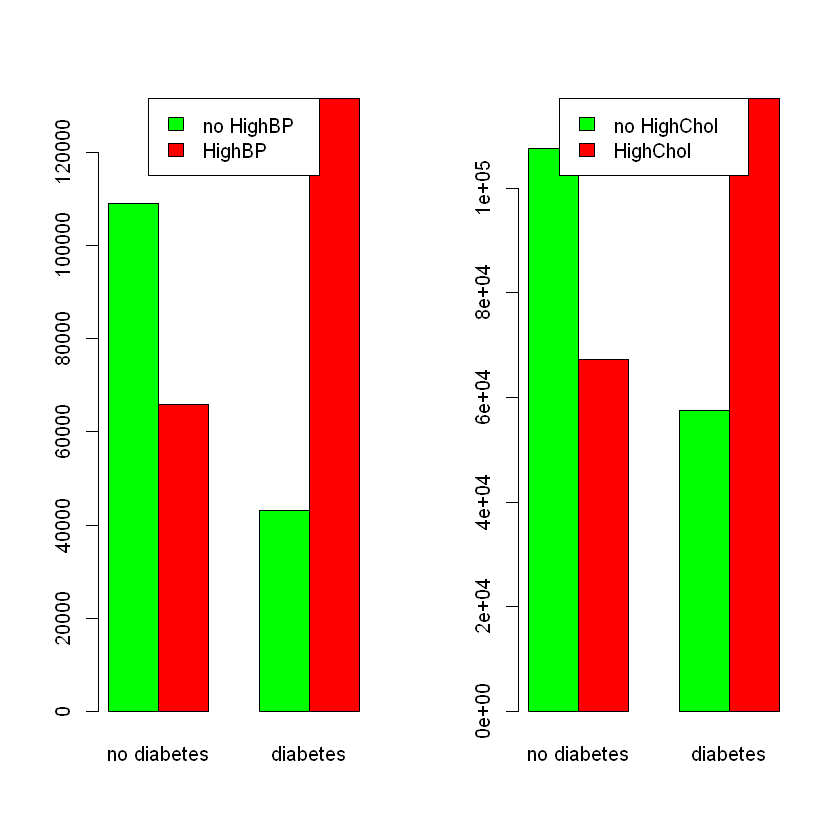

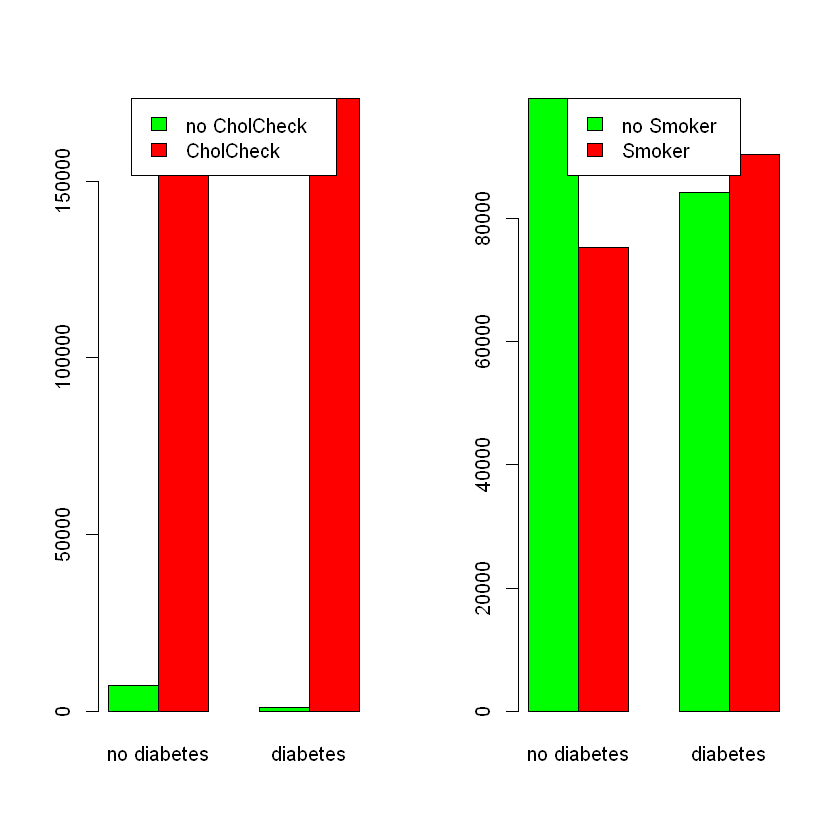

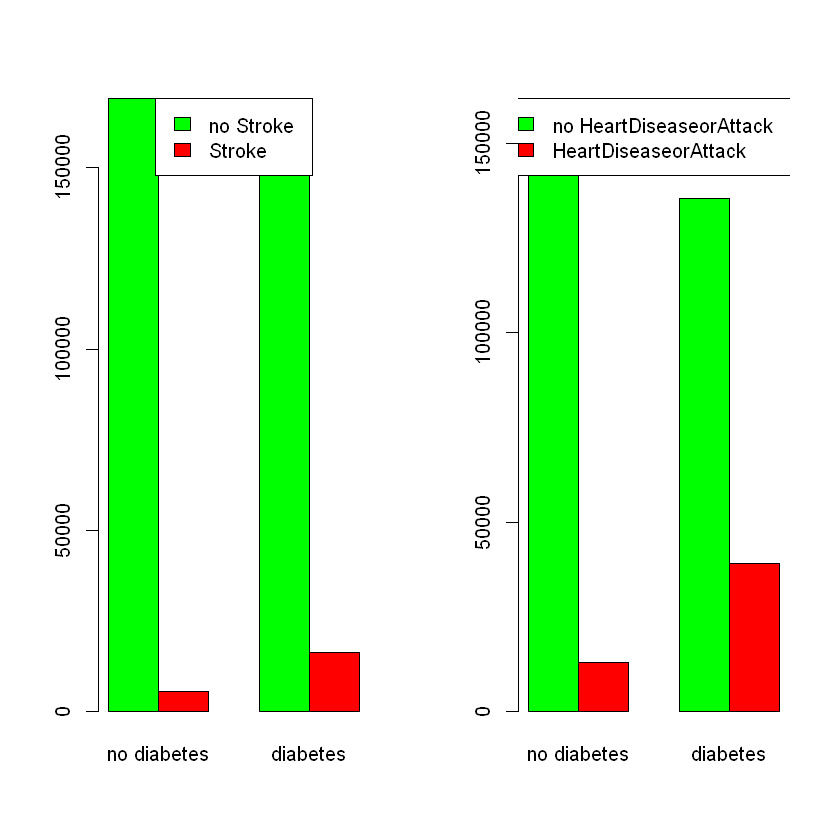

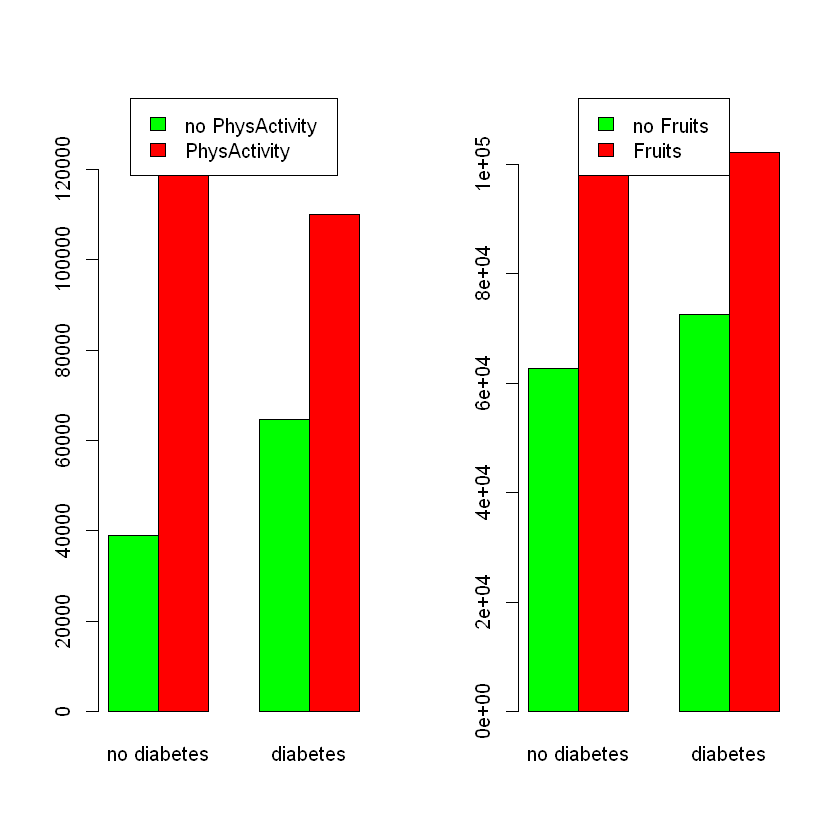

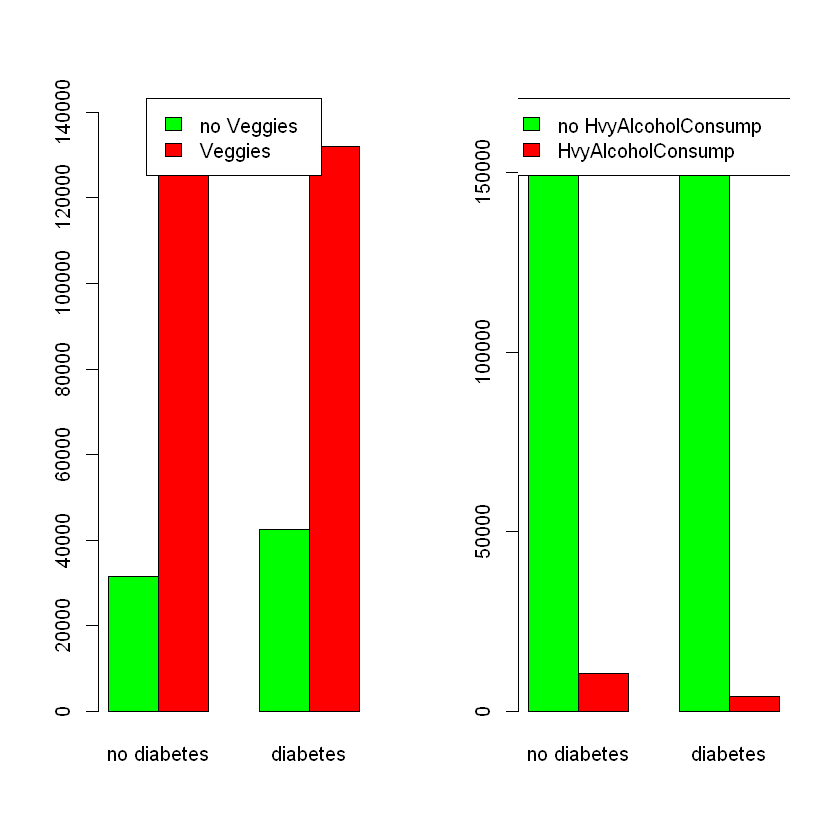

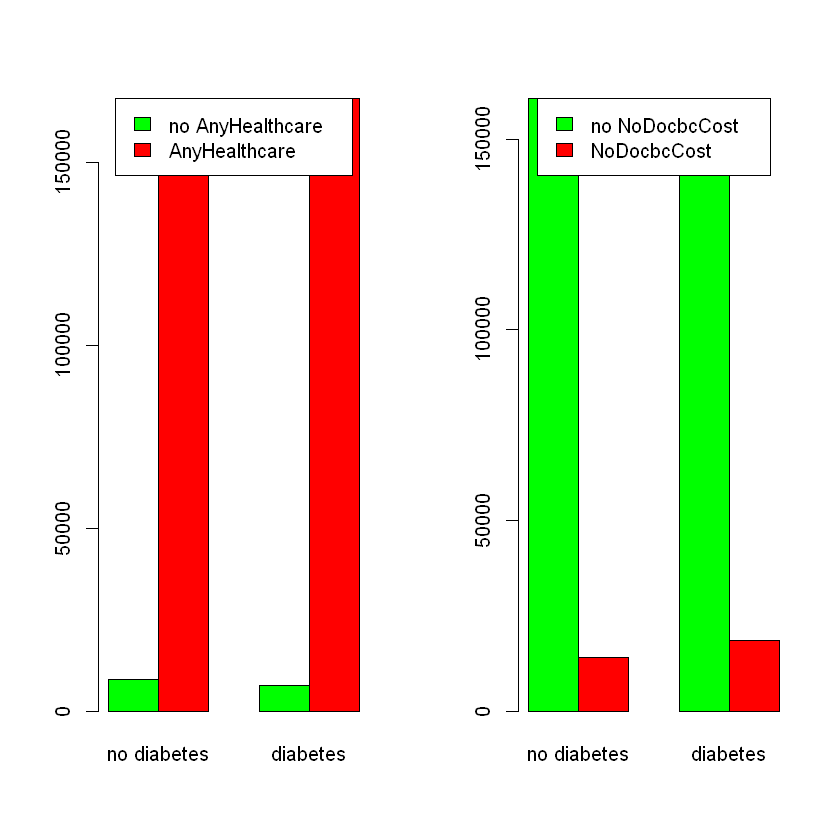

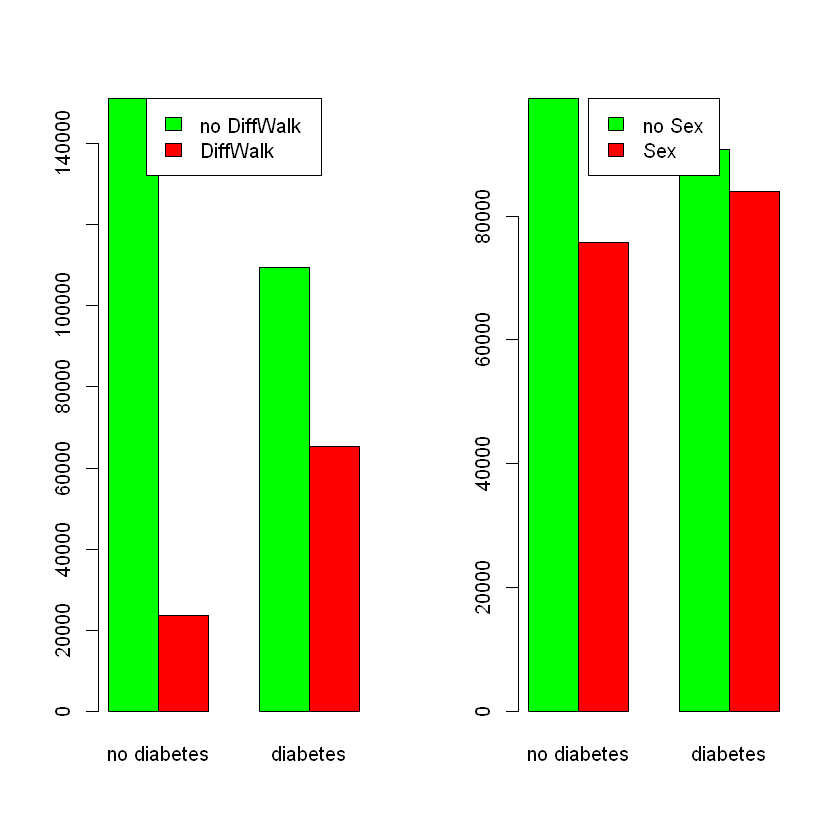

In [571]:
par(mfrow = c(1,2))
for (col in binary_cols)
{
    contingency_table = table(balanced_training_data[, col], balanced_training_data$Diabetes_binary)
    rownames(contingency_table) = c(sprintf("no %s", col), col)
    colnames(contingency_table) = c("no diabetes", "diabetes")
    plot_stack_bar_2x2(contingency_table)
}

In [572]:
summary_categorical_variables = function(df, explain_col, response_col, is.binary = T, prop.r = T,
                                        prop.c = T, prop.t = T)
{
    contingency_table = table(df[, explain_col], df[, response_col], dnn = c(explain_col, response_col))
    if (is.binary)
    {
        rownames(contingency_table) = c(paste("no", explain_col), explain_col)
        gmodels::CrossTable(contingency_table, prop.r = prop.r, prop.c = prop.c, prop.t = prop.t, prop.chisq = FALSE, chisq = T)
        print("Odds Ratio")
        print(OddsRatio(contingency_table, conf.level = 0.95))
        print("Relative Risk")
        print(RelRisk(contingency_table, conf.level = 0.95, method = "wald"))
    }
    else
    {
        CrossTable(contingency_table, prop.r = prop.r, prop.c = prop.c, prop.t = prop.t, prop.chisq = FALSE, chisq = T)
    }
}

In [573]:
for (bin_col in binary_cols)
{
    summary_categorical_variables(balanced_training_data, bin_col, response_col)
}


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  349366 

 
             | Diabetes_binary 
      HighBP |         0 |         1 | Row Total | 
-------------|-----------|-----------|-----------|
   no HighBP |    109005 |     43058 |    152063 | 
             |     0.717 |     0.283 |     0.435 | 
             |     0.624 |     0.247 |           | 
             |     0.312 |     0.123 |           | 
-------------|-----------|-----------|-----------|
      HighBP |     65761 |    131542 |    197303 | 
             |     0.333 |     0.667 |     0.565 | 
             |     0.376 |     0.753 |           | 
             |     0.188 |     0.377 |           | 
-------------|-----------|-----------|-----------|
Column Total |    174766 |    174600 |    349366 | 
             |     0.500 |     0.500 |           | 
-----------

### 3.6. Categorical - ordinal variables analysis

In [574]:
ordinal_cols

[1] "GenHlth"   "Age"       "Education" "Income"

In [575]:
for (ord_col in ordinal_cols)
{
    summary_categorical_variables(df, ord_col, response_col, is.binary = F)
}


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  253680 

 
             | Diabetes_binary 
     GenHlth |         0 |         1 | Row Total | 
-------------|-----------|-----------|-----------|
           1 |     44159 |      1140 |     45299 | 
             |     0.975 |     0.025 |     0.179 | 
             |     0.202 |     0.032 |           | 
             |     0.174 |     0.004 |           | 
-------------|-----------|-----------|-----------|
           2 |     82703 |      6381 |     89084 | 
             |     0.928 |     0.072 |     0.351 | 
             |     0.379 |     0.181 |           | 
             |     0.326 |     0.025 |           | 
-------------|-----------|-----------|-----------|
           3 |     62189 |     13457 |     75646 | 
             |     0.822 |     0.178 |     0.298 | 
           

In [576]:
plot_ordinal_data = function(dataframe, ordinal_col)
{
    barplot(summary(factor(dataframe[no_diabetes_rows, ][, ordinal_col])), main = sprintf("no_diabetes_rows - %s", ordinal_col),
           col = MAIN_COLOR, las = 1, lwd = 2)
    barplot(summary(factor(dataframe[with_diabetes_rows, ][, ordinal_col])), main = sprintf("no_diabetes_rows - %s", ordinal_col),
           col = MAIN_COLOR, las = 1, lwd = 2)
}

#### 3.6.1. GenHlth

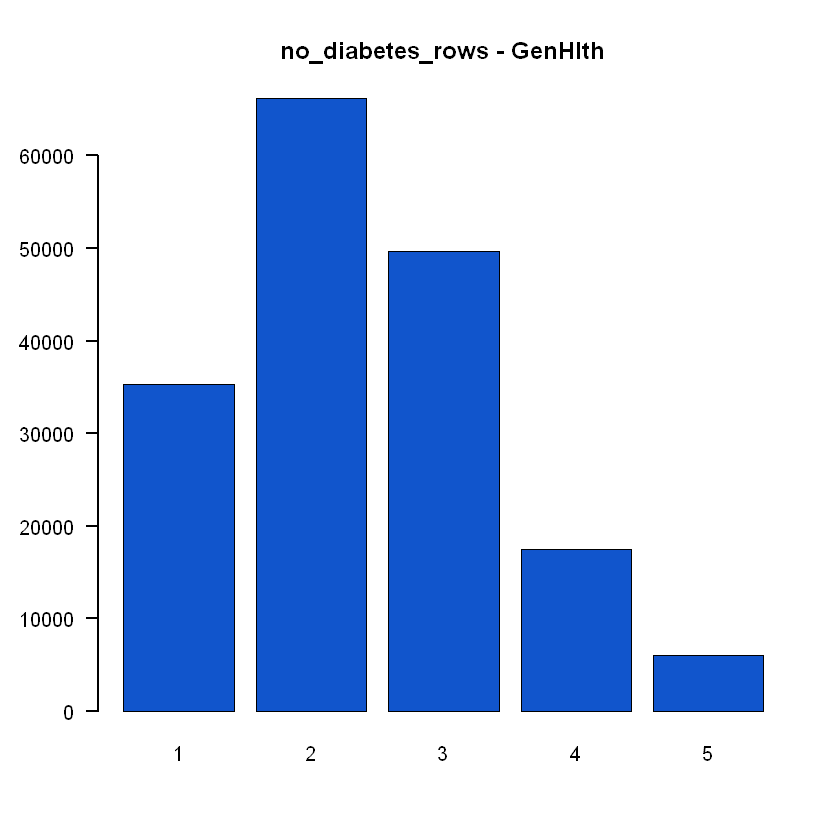

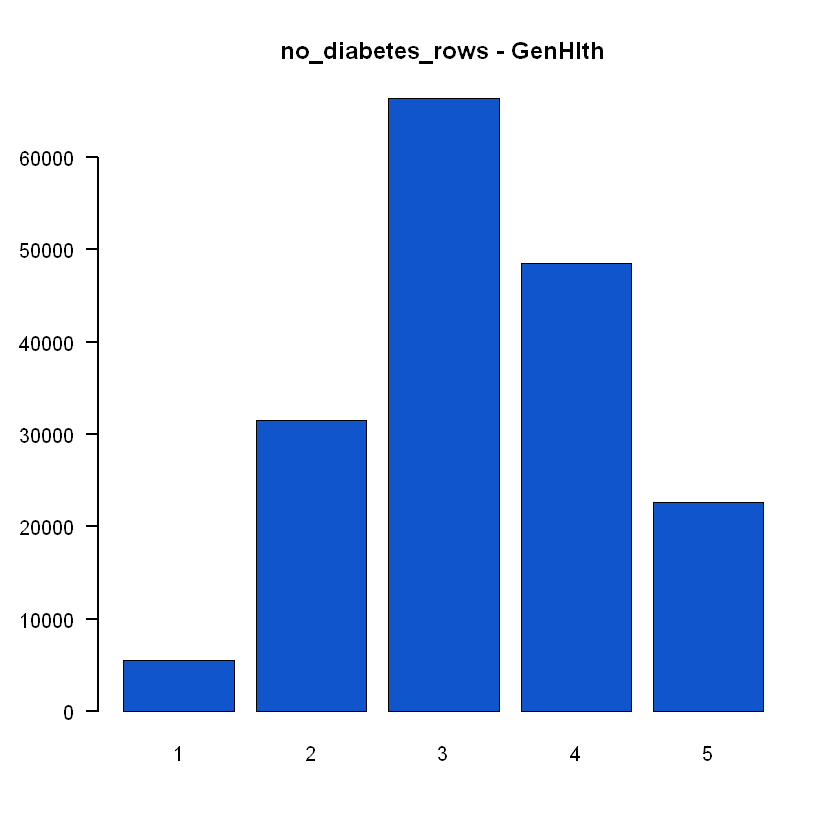

In [577]:
plot_ordinal_data(balanced_training_data, "GenHlth")

#### 3.6.2. Age

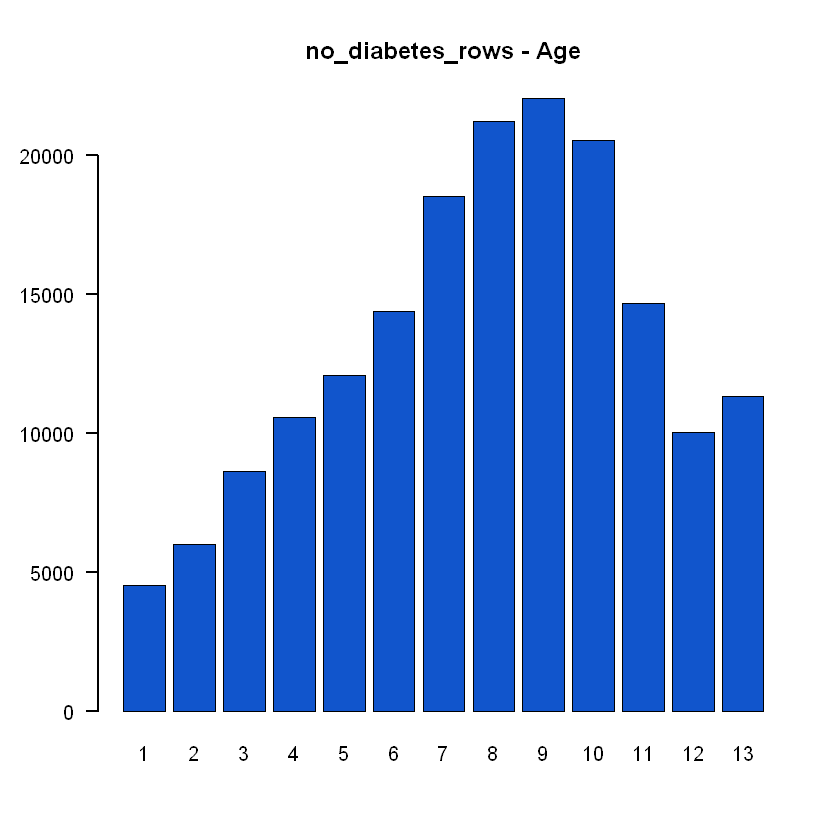

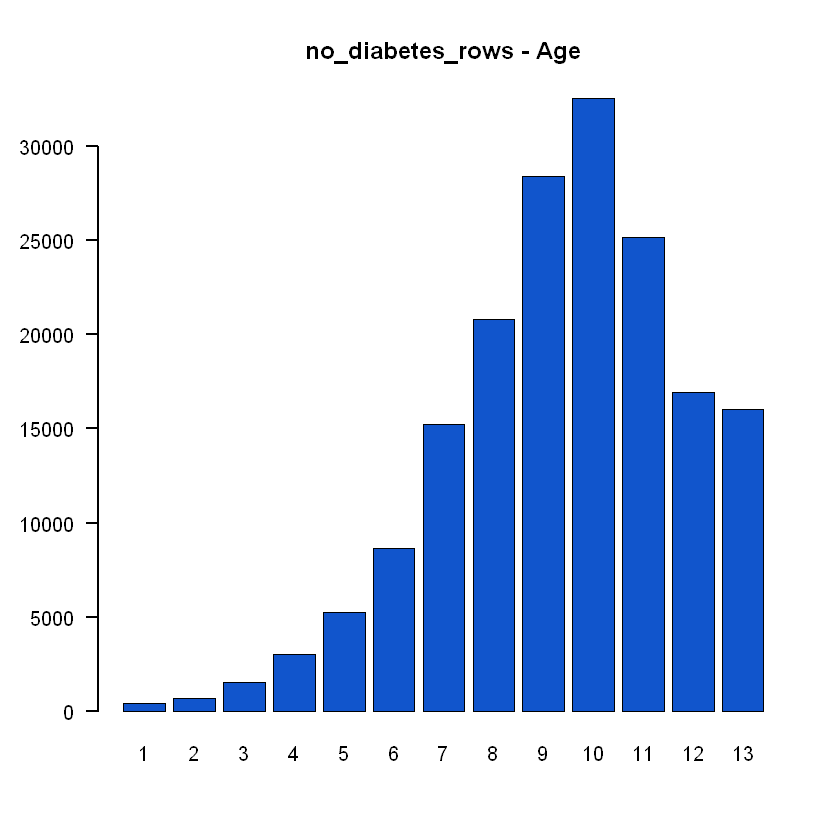

In [578]:
plot_ordinal_data(balanced_training_data, "Age")

#### 3.6.3. Education

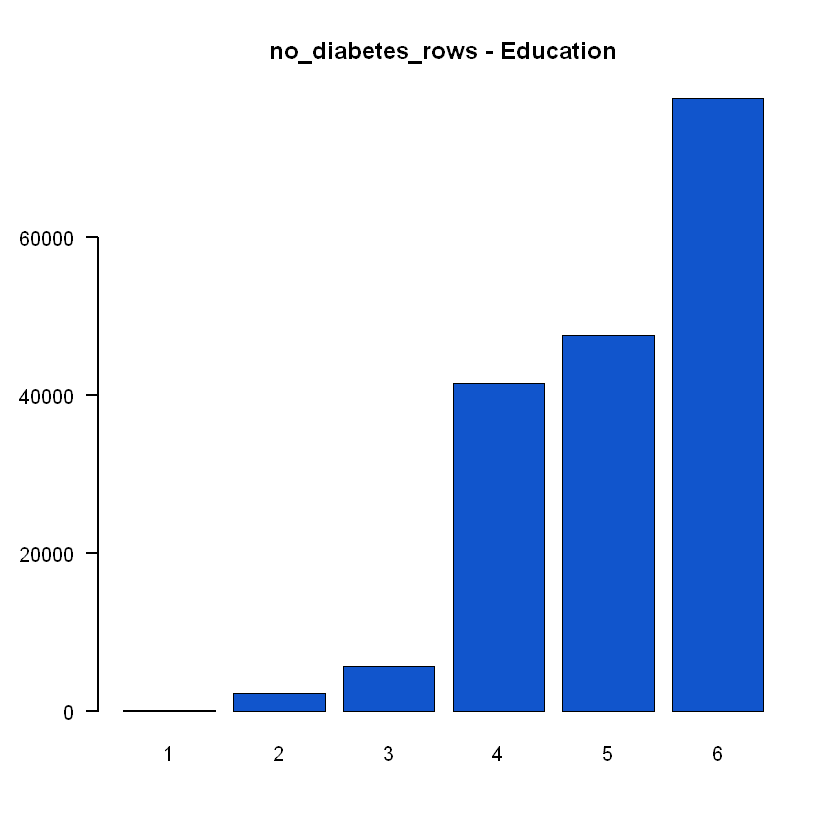

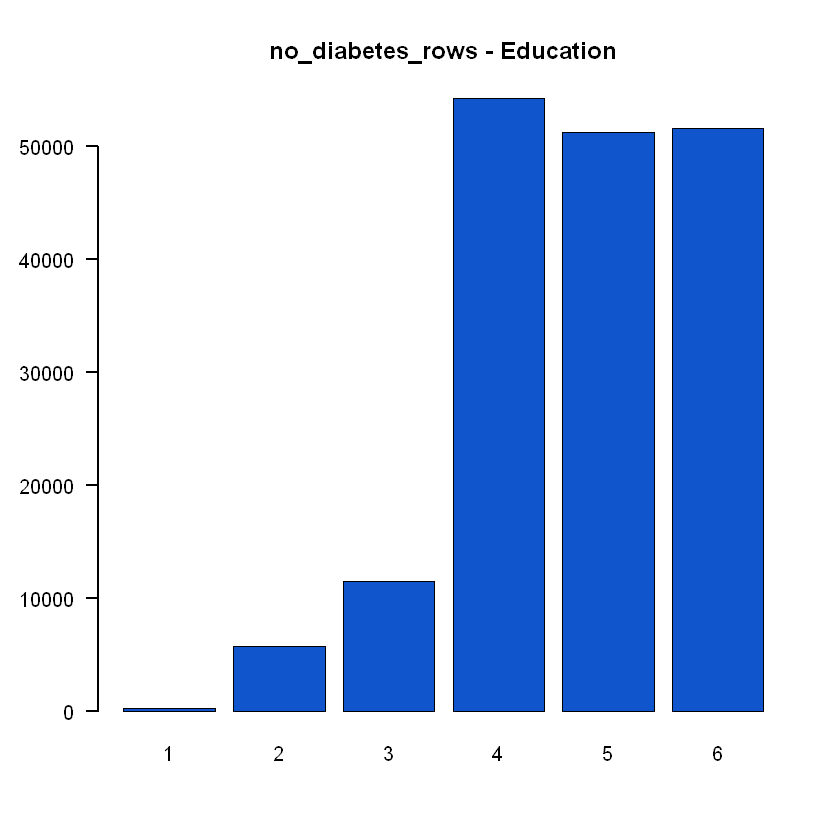

In [579]:
plot_ordinal_data(balanced_training_data, "Education")

#### 3.6.4. Income

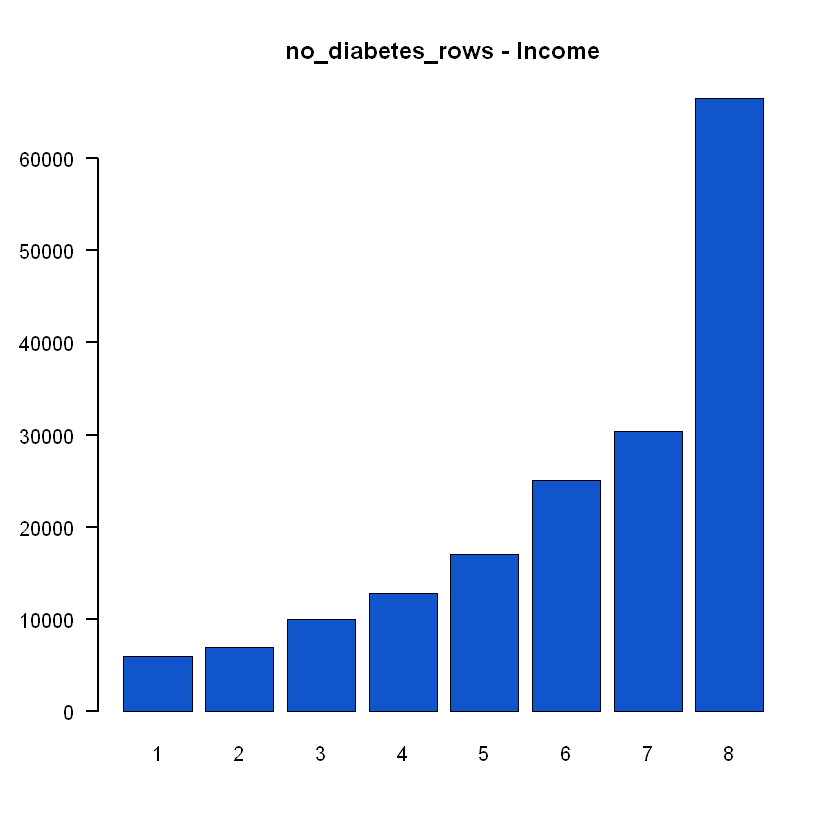

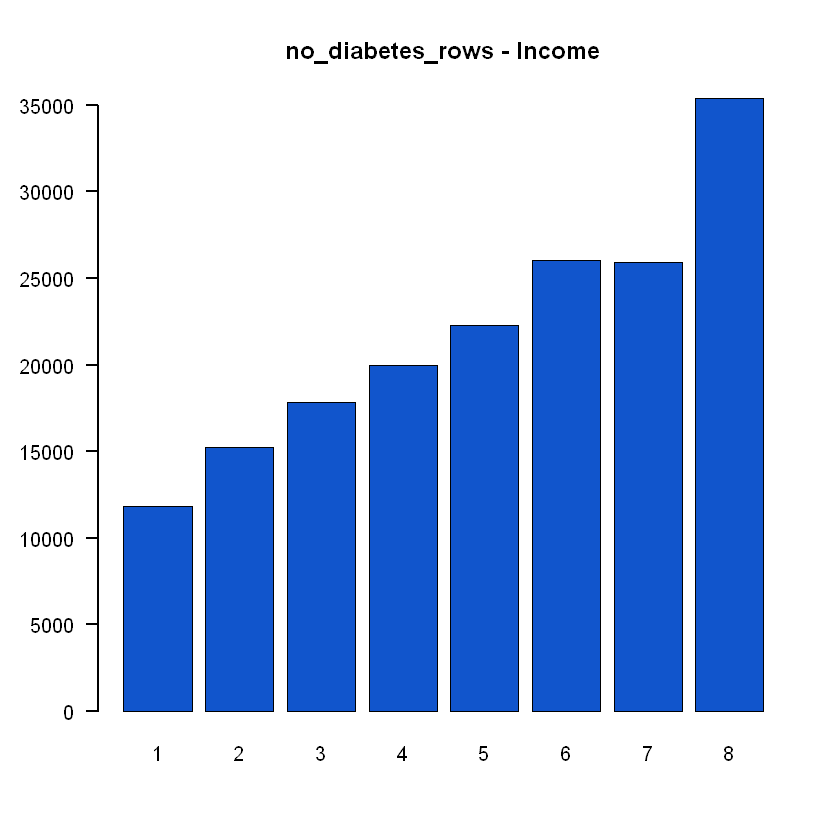

In [580]:
plot_ordinal_data(balanced_training_data, "Income")

### 3.7. Correlation analysis

In [581]:
all_colnames = colnames(balanced_training_data)

In [582]:
correlation_matrix = matrix(0, nrow = length(all_colnames), ncol = length(all_colnames), dimnames = list(all_colnames, all_colnames))

In [583]:
for (row_index in 1:nrow(correlation_matrix))
{
    for (col_index in row_index:ncol(correlation_matrix))
    {
        if (row_index == col_index)
        {
            correlation_matrix[row_index, col_index] = 1
        }
        else
        {
            correlation_matrix[row_index, col_index] = get_correlation(balanced_training_data, all_colnames[row_index],
                                                                       all_colnames[col_index], numerical_cols, 
                                                                       binary_cols, ordinal_cols, response_col)
        }
    }    
}

In [584]:
correlation_matrix

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,⋯,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
HighBP,1,0.3161,0.10680,0.23972952,0.08723000,0.12740000,0.20820000,0.1365000,0.0433300,0.06478000,⋯,0.02569000,0.29413475,0.067531339,0.172817573,0.2389000,0.04024000,0.274080290,-0.140475014,-0.1776114917,0.38030000
HighChol,0,1.0000,0.08783,0.12472293,0.09529000,0.09491000,0.17680000,0.0902200,0.0450000,0.04318000,⋯,0.03129000,0.21754848,0.087920665,0.140314588,0.1632000,0.01806000,0.184665370,-0.078991430,-0.1004524322,0.28700000
CholCheck,0,0.0000,1.00000,0.04872112,0.00228300,0.02475000,0.04482000,0.0076440,0.0159500,0.00164900,⋯,0.05011000,0.05799860,-0.002907355,0.034417578,0.0491800,0.01281000,0.081417680,-0.008976256,-0.0007136125,0.11380000
BMI,0,0.0000,0.00000,1.00000000,0.01219908,0.02083222,0.05649684,-0.1685938,-0.0876854,-0.05821772,⋯,0.06662242,0.21962258,0.107144718,0.159940304,0.2479799,0.00130982,-0.030861161,-0.095596596,-0.0909353838,0.28927267
Smoker,0,0.0000,0.00000,0.00000000,1.00000000,0.06067000,0.12400000,0.0733200,0.0708900,0.02699000,⋯,0.02994000,0.13448434,0.086437566,0.115390506,0.1169000,0.11530000,0.084485757,-0.139028003,-0.1034390726,0.08673000
Stroke,0,0.0000,0.00000,0.00000000,0.00000000,1.00000000,0.21780000,0.0761400,0.0133300,0.04625000,⋯,0.03784000,0.16302902,0.089709240,0.159998623,0.1908000,0.00275800,0.101616530,-0.068361115,-0.1198730475,0.12480000
HeartDiseaseorAttack,0,0.0000,0.00000,0.00000000,0.00000000,0.00000000,1.00000000,0.0975000,0.0226800,0.03646000,⋯,0.03076000,0.24461421,0.081737881,0.197701639,0.2377000,0.10130000,0.192853204,-0.089525866,-0.1342276385,0.21090000
PhysActivity,0,0.0000,0.00000,0.00000000,0.00000000,0.00000000,0.00000000,1.0000000,0.1307000,0.15100000,⋯,0.06168000,-0.24834313,-0.134185459,-0.237014387,0.2768000,0.05084000,-0.080109208,0.178288872,0.1800410085,0.16060000
Fruits,0,0.0000,0.00000,0.00000000,0.00000000,0.00000000,0.00000000,0.0000000,1.0000000,0.24340000,⋯,0.03596000,-0.08803681,-0.061598266,-0.046981788,0.0529100,0.09214000,0.055994888,0.095528806,0.0628753221,0.05769000
Veggies,0,0.0000,0.00000,0.00000000,0.00000000,0.00000000,0.00000000,0.0000000,0.0000000,1.00000000,⋯,0.03460000,-0.10855775,-0.060113798,-0.068801398,0.0860600,0.05272000,-0.012678996,0.142789940,0.1357496833,0.07734000


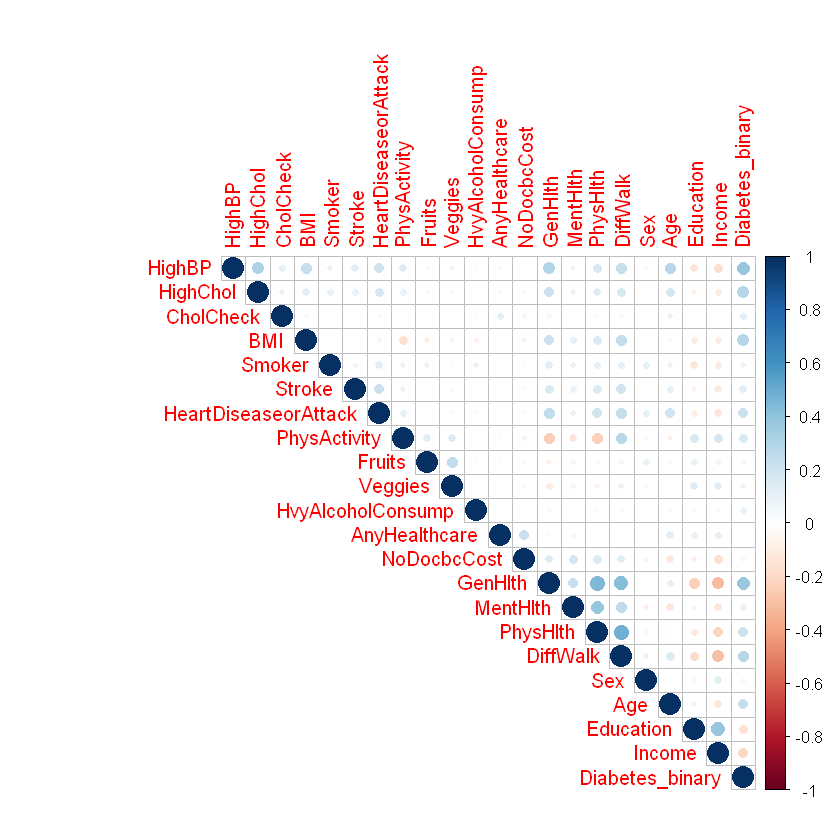

In [585]:
corrplot::corrplot(correlation_matrix, method="circle", type="upper")

## 4. Model building

In [586]:
str(balanced_training_data)

'data.frame':	349366 obs. of  22 variables:
 $ HighBP              : Factor w/ 2 levels "0","1": 2 1 2 2 2 2 2 2 1 1 ...
 $ HighChol            : Factor w/ 2 levels "0","1": 2 1 2 1 2 2 1 2 1 1 ...
 $ CholCheck           : Factor w/ 2 levels "0","1": 2 1 2 2 2 2 2 2 2 2 ...
 $ BMI                 : int  40 25 28 27 24 25 30 25 24 26 ...
 $ Smoker              : Factor w/ 2 levels "0","1": 2 2 1 1 1 2 2 2 1 2 ...
 $ Stroke              : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ HeartDiseaseorAttack: Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ PhysActivity        : Factor w/ 2 levels "0","1": 1 2 1 2 2 2 1 2 1 1 ...
 $ Fruits              : Factor w/ 2 levels "0","1": 1 1 2 2 2 2 1 1 1 1 ...
 $ Veggies             : Factor w/ 2 levels "0","1": 2 1 1 2 2 2 1 2 2 2 ...
 $ HvyAlcoholConsump   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ AnyHealthcare       : Factor w/ 2 levels "0","1": 2 1 2 2 2 2 2 2 2 2 ...
 $ NoDocbcCost         : Factor w/ 2 levels "

### 4.1. Data standardization

#### BMI

In [587]:
balanced_training_data$BMI = scale(balanced_training_data$BMI)
testing_data$BMI = scale(testing_data$BMI)

#### MentHlth

In [588]:
balanced_training_data$MentHlth = scale(balanced_training_data$MentHlth)
testing_data$MentHlth = scale(testing_data$MentHlth)

#### PhysHlth

In [589]:
balanced_training_data$PhysHlth = scale(balanced_training_data$PhysHlth)
testing_data$PhysHlth = scale(testing_data$PhysHlth)

In [590]:
str(balanced_training_data)

'data.frame':	349366 obs. of  22 variables:
 $ HighBP              : Factor w/ 2 levels "0","1": 2 1 2 2 2 2 2 2 1 1 ...
 $ HighChol            : Factor w/ 2 levels "0","1": 2 1 2 1 2 2 1 2 1 1 ...
 $ CholCheck           : Factor w/ 2 levels "0","1": 2 1 2 2 2 2 2 2 2 2 ...
 $ BMI                 : num [1:349366, 1] 1.41 -0.679 -0.261 -0.401 -0.818 ...
  ..- attr(*, "scaled:center")= num 29.9
  ..- attr(*, "scaled:scale")= num 7.18
 $ Smoker              : Factor w/ 2 levels "0","1": 2 2 1 1 1 2 2 2 1 2 ...
 $ Stroke              : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ HeartDiseaseorAttack: Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ PhysActivity        : Factor w/ 2 levels "0","1": 1 2 1 2 2 2 1 2 1 1 ...
 $ Fruits              : Factor w/ 2 levels "0","1": 1 1 2 2 2 2 1 1 1 1 ...
 $ Veggies             : Factor w/ 2 levels "0","1": 2 1 1 2 2 2 1 2 2 2 ...
 $ HvyAlcoholConsump   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ AnyHealthcare       : 

In [591]:
str(testing_data)

'data.frame':	50736 obs. of  22 variables:
 $ HighBP              : Factor w/ 2 levels "0","1": 2 2 1 1 2 1 1 2 2 2 ...
 $ HighChol            : Factor w/ 2 levels "0","1": 2 2 1 1 2 2 1 1 1 2 ...
 $ CholCheck           : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 2 ...
 $ BMI                 : num [1:50736, 1] 0.8527 -0.0621 -0.8243 0.5478 1.3101 ...
  ..- attr(*, "scaled:center")= num 28.4
  ..- attr(*, "scaled:scale")= num 6.56
 $ Smoker              : Factor w/ 2 levels "0","1": 2 1 2 1 2 2 1 1 1 1 ...
 $ Stroke              : Factor w/ 2 levels "0","1": 1 1 1 1 2 1 1 1 1 1 ...
 $ HeartDiseaseorAttack: Factor w/ 2 levels "0","1": 1 1 1 1 2 1 1 1 1 1 ...
 $ PhysActivity        : Factor w/ 2 levels "0","1": 1 1 2 2 1 2 2 2 1 2 ...
 $ Fruits              : Factor w/ 2 levels "0","1": 2 1 1 2 1 2 2 2 2 2 ...
 $ Veggies             : Factor w/ 2 levels "0","1": 2 2 1 2 2 2 2 2 1 2 ...
 $ HvyAlcoholConsump   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ AnyHealthcare       

### 4.3. Build the model

In [592]:
my_model = glm(Diabetes_binary ~ . , data = balanced_training_data, family = binomial)

#### 4.3.1. AIC stepwise

In [593]:
# AIC
aic_result = MASS::stepAIC(my_model, direction = "backward", k = 2)

Start:  AIC=356280.2
Diabetes_binary ~ HighBP + HighChol + CholCheck + BMI + Smoker + 
    Stroke + HeartDiseaseorAttack + PhysActivity + Fruits + Veggies + 
    HvyAlcoholConsump + AnyHealthcare + NoDocbcCost + GenHlth + 
    MentHlth + PhysHlth + DiffWalk + Sex + Age + Education + 
    Income

                       Df Deviance    AIC
<none>                      356188 356280
- Veggies               1   356197 356287
- Smoker                1   356198 356288
- Fruits                1   356199 356289
- AnyHealthcare         1   356200 356290
- NoDocbcCost           1   356201 356291
- PhysHlth              1   356213 356303
- PhysActivity          1   356223 356313
- MentHlth              1   356242 356332
- Education             5   356295 356377
- DiffWalk              1   356312 356402
- Stroke                1   356318 356408
- HeartDiseaseorAttack  1   356686 356776
- Income                7   357095 357173
- HvyAlcoholConsump     1   357357 357447
- Sex                   1   357

In [594]:
# # Best AIC model
# Diabetes_binary ~ HighBP + HighChol + CholCheck + BMI + BMI_over_45 + 
#     Smoker + Stroke + HeartDiseaseorAttack + PhysActivity + Fruits + 
#     Veggies + HvyAlcoholConsump + AnyHealthcare + NoDocbcCost + 
#     GenHlth + MentHlth + PhysHlth + havePhysHlth + DiffWalk + 
#     Sex + Age + Education + Income

#### 4.3.2. BIC stepwise

In [595]:
# BIC
bic_result = MASS::stepAIC(my_model, direction = "backward", k = log(nrow(balanced_training_data)))

Start:  AIC=356775.3
Diabetes_binary ~ HighBP + HighChol + CholCheck + BMI + Smoker + 
    Stroke + HeartDiseaseorAttack + PhysActivity + Fruits + Veggies + 
    HvyAlcoholConsump + AnyHealthcare + NoDocbcCost + GenHlth + 
    MentHlth + PhysHlth + DiffWalk + Sex + Age + Education + 
    Income

                       Df Deviance    AIC
- Veggies               1   356197 356772
- Smoker                1   356198 356772
- Fruits                1   356199 356774
- AnyHealthcare         1   356200 356775
<none>                      356188 356775
- NoDocbcCost           1   356201 356776
- PhysHlth              1   356213 356787
- PhysActivity          1   356223 356797
- MentHlth              1   356242 356816
- Education             5   356295 356818
- DiffWalk              1   356312 356886
- Stroke                1   356318 356892
- HeartDiseaseorAttack  1   356686 357260
- Income                7   357095 357593
- HvyAlcoholConsump     1   357357 357931
- Sex                   1   357

In [596]:
# # Best BIC model
# Diabetes_binary ~ HighBP + HighChol + CholCheck + BMI + BMI_over_45 + 
#     Stroke + HeartDiseaseorAttack + PhysActivity + Veggies + 
#     HvyAlcoholConsump + GenHlth + MentHlth + PhysHlth + DiffWalk + 
#     Sex + Age + Education + Income

### 4.4. Best model selection

In [597]:
best_aic_model = glm(Diabetes_binary ~ HighBP + HighChol + CholCheck + BMI + Smoker + 
    Stroke + HeartDiseaseorAttack + PhysActivity + Fruits + Veggies + 
    HvyAlcoholConsump + AnyHealthcare + NoDocbcCost + GenHlth + 
    MentHlth + PhysHlth + DiffWalk + Sex + Age + Education + 
    Income, data = balanced_training_data, family = binomial)

In [598]:
best_bic_model = glm(Diabetes_binary ~ HighBP + HighChol + CholCheck + BMI + Stroke + 
    HeartDiseaseorAttack + PhysActivity + Fruits + HvyAlcoholConsump + 
    GenHlth + MentHlth + PhysHlth + DiffWalk + Sex + Age + Education + 
    Income, data = balanced_training_data, family = binomial)

In [599]:
anova(best_aic_model, best_bic_model, test = "Chisq")

,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,349320,356188.2,NA,NA,NA
2,349324,356228.6,-4,-40.35221,3.659943e-08


In [ ]:
# COMMENT
# Choose "best_bic_model"

In [600]:
# best_bic_model = glm(Diabetes_binary ~ HighBP + HighChol + CholCheck + BMI + Stroke + 
#     HeartDiseaseorAttack + PhysActivity + Fruits + HvyAlcoholConsump + 
#     GenHlth + MentHlth + PhysHlth + DiffWalk + Sex + Age + Education + 
#     Income, data = balanced_training_data, family = binomial)

### 4.5. Link function selection

In [601]:
# Create the dataframe
aic_link_function_df <- data.frame(
  link_function_name = c("logit", "probit", "cauchit", "cloglog"),
  aic_value = rep(0, 4)
)
aic_link_function_df

link_function_name,aic_value
<chr>,<dbl>
logit,0
probit,0
cauchit,0
cloglog,0


In [602]:
logit_best_bic_model = glm(Diabetes_binary ~ HighBP + HighChol + CholCheck + BMI + Stroke + 
    HeartDiseaseorAttack + PhysActivity + Fruits + HvyAlcoholConsump + 
    GenHlth + MentHlth + PhysHlth + DiffWalk + Sex + Age + Education + 
    Income, data = balanced_training_data, family = binomial(link = "logit"))

In [603]:
aic_link_function_df[1, 2] = summary(logit_best_bic_model)$aic

In [604]:
probit_best_bic_model = glm(Diabetes_binary ~ HighBP + HighChol + CholCheck + BMI + Stroke + 
    HeartDiseaseorAttack + PhysActivity + Fruits + HvyAlcoholConsump + 
    GenHlth + MentHlth + PhysHlth + DiffWalk + Sex + Age + Education + 
    Income, data = balanced_training_data, family = binomial(link = "probit"))

In [605]:
aic_link_function_df[2, 2] = summary(probit_best_bic_model)$aic

In [606]:
cauchit_best_bic_model = glm(Diabetes_binary ~ HighBP + HighChol + CholCheck + BMI + Stroke + 
    HeartDiseaseorAttack + PhysActivity + Fruits + HvyAlcoholConsump + 
    GenHlth + MentHlth + PhysHlth + DiffWalk + Sex + Age + Education + 
    Income, data = balanced_training_data, family = binomial(link = "cauchit"))

In [607]:
aic_link_function_df[3, 2] = summary(cauchit_best_bic_model)$aic

In [608]:
cloglog_best_bic_model = glm(Diabetes_binary ~ HighBP + HighChol + CholCheck + BMI + Stroke + 
    HeartDiseaseorAttack + PhysActivity + Fruits + HvyAlcoholConsump + 
    GenHlth + MentHlth + PhysHlth + DiffWalk + Sex + Age + Education + 
    Income, data = balanced_training_data, family = binomial(link = "cloglog"))

In [609]:
aic_link_function_df[4, 2] = summary(cloglog_best_bic_model)$aic

In [610]:
aic_link_function_df

link_function_name,aic_value
<chr>,<dbl>
logit,356312.6
probit,356543.3
cauchit,358389.7
cloglog,361389.7


In [611]:
aic_link_function_df[which.min(aic_link_function_df$aic_value), ]

,link_function_name,aic_value
,<chr>,<dbl>
1,logit,356312.6


In [613]:
# COMMENT
# Best link function model
# logit_best_bic_model = glm(Diabetes_binary ~ HighBP + HighChol + CholCheck + BMI + Stroke + 
#     HeartDiseaseorAttack + PhysActivity + Fruits + HvyAlcoholConsump + 
#     GenHlth + MentHlth + PhysHlth + DiffWalk + Sex + Age + Education + 
#     Income, data = balanced_training_data, family = binomial(link = "logit"))

## 5. Model training and evaluating

In [614]:
evaluate_classification_model = function(binary_predictions, binary_real_data)
{
    accuracy = mean(binary_predictions == binary_real_data)
    precision <- sum(binary_predictions == 1 & binary_real_data == 1) / sum(binary_predictions == 1)
    recall <- sum(binary_predictions == 1 & binary_real_data == 1) / sum(binary_real_data == 1)
    f1_score <- 2 * precision * recall / (precision + recall)
    
    # Print the results
    cat("Accuracy:", accuracy, "\n")
    cat("Precision:", precision, "\n")
    cat("Recall:", recall, "\n")
    cat("F1 Score:", f1_score, "\n")
}

one_for_all_metric = function(model, new_data, variable_name, binary_threshold = 0.5)
{
    predictions = predict(model, newdata = new_data, type = "response")
    binary_predictions = ifelse(predictions >= binary_threshold, 1, 0)
    actual_response = new_data[, variable_name]
    
    cat("\n", "Metric 1: ANOVA", "\n")
    print(summary(model))

    cat("\n", "Metric 2: Model performance", "\n")
    print(confusionMatrix(table(binary_predictions, actual_response)))
    evaluate_classification_model(binary_predictions, actual_response)

    cat("\n", "Metric 3: ROC curve - AUC", "\n")
    roc_score = pROC::roc(actual_response, binary_predictions)
    cat("AUC: ", auc(roc_score))
    plot(roc_score ,main = "ROC curve -- Logistic Regression ")
    
    cat("\n", "Metric 4: Overdispersion tests", "\n")
    DHARMa::testDispersion(model, alternative = "greater")

    cat("\n", "Metric 4: Goodness-of-fit", "\n")
    summary_model = summary(model)
    cat("residual:", summary_model$deviance, "\n")
    cat("dof:", summary_model$df[2], "\n")
    cat("goodness-of-fit:", 1- pchisq(summary_model$deviance, df = summary_model$df[2]))

    cat("\n", "Metric 5: QQ-norm", "\n")
    qqnorm(residuals(probit_best_bic_model))
    abline(a = 0, b = 1, col = "red")
}


 Metric 1: ANOVA 

Call:
glm(formula = Diabetes_binary ~ HighBP + HighChol + CholCheck + 
    BMI + Stroke + HeartDiseaseorAttack + PhysActivity + Fruits + 
    HvyAlcoholConsump + GenHlth + MentHlth + PhysHlth + DiffWalk + 
    Sex + Age + Education + Income, family = binomial(link = "logit"), 
    data = balanced_training_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.3832  -0.8101  -0.0974   0.8254   3.0785  

Coefficients:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)           -2.324829   0.044017 -52.817  < 2e-16 ***
HighBP1                0.710623   0.008910  79.758  < 2e-16 ***
HighChol1              0.546589   0.008532  64.062  < 2e-16 ***
CholCheck1             1.256386   0.035811  35.084  < 2e-16 ***
BMI                    0.495759   0.005017  98.815  < 2e-16 ***
Stroke1                0.207125   0.018277  11.332  < 2e-16 ***
HeartDiseaseorAttack1  0.279889   0.012714  22.015  < 2e-16 ***
PhysActivity1         -0.0

Setting levels: control = 0, case = 1

Setting direction: controls < cases



AUC:  0.7483683
 Metric 4: Overdispersion tests 


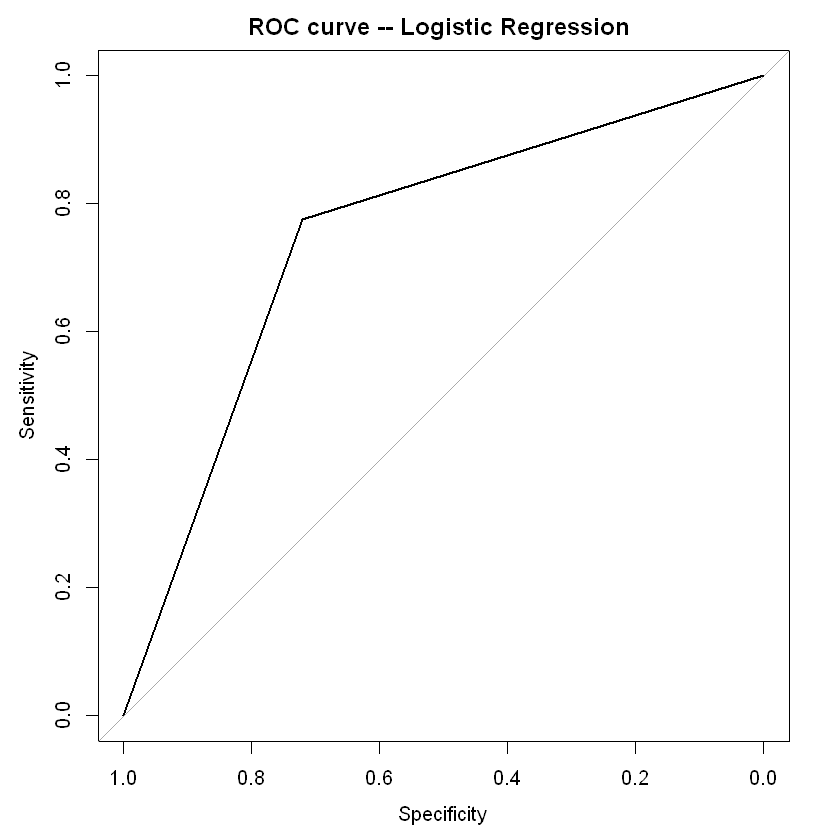


 Metric 4: Goodness-of-fit 
residual: 356228.6 
dof: 349324 
goodness-of-fit: 1.110223e-16
 Metric 5: QQ-norm 


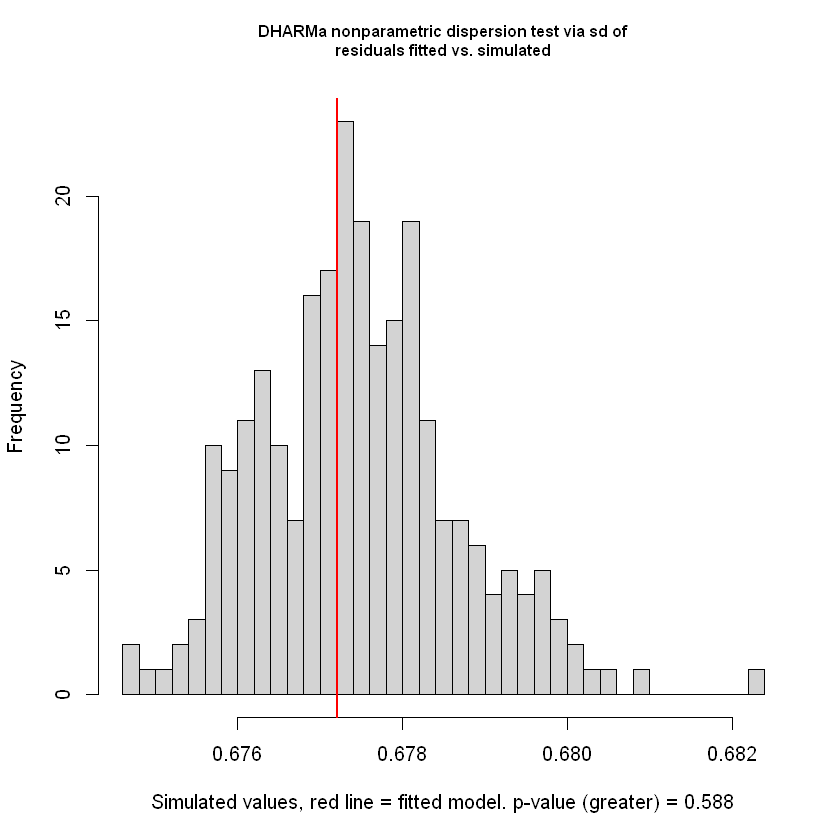

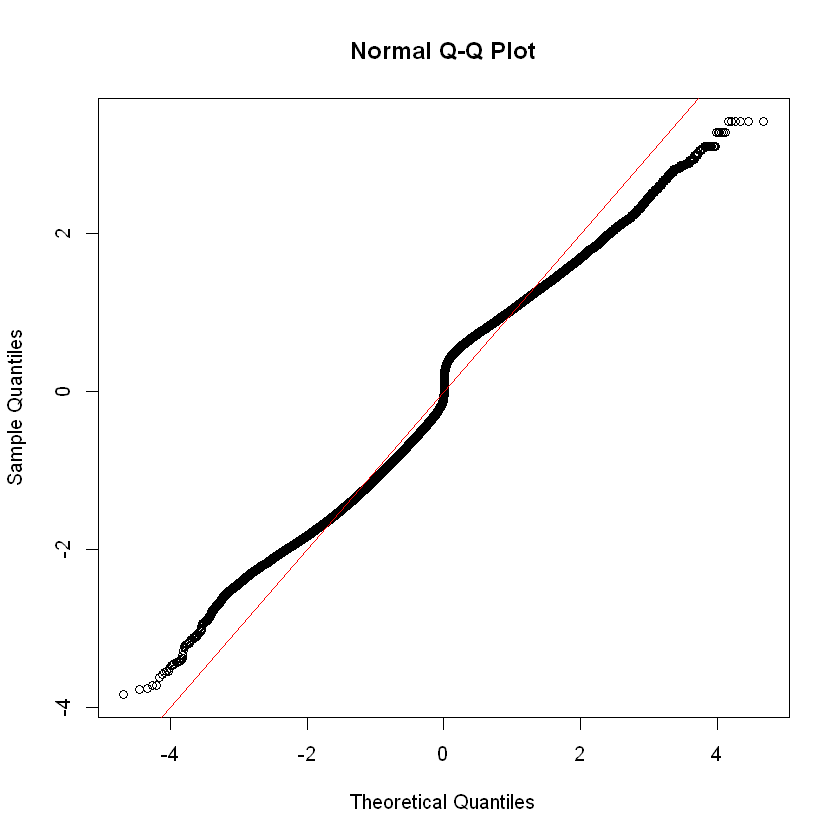

In [615]:
one_for_all_metric(logit_best_bic_model, balanced_training_data, "Diabetes_binary")


 Metric 1: ANOVA 

Call:
glm(formula = Diabetes_binary ~ HighBP + HighChol + CholCheck + 
    BMI + Stroke + HeartDiseaseorAttack + PhysActivity + Fruits + 
    HvyAlcoholConsump + GenHlth + MentHlth + PhysHlth + DiffWalk + 
    Sex + Age + Education + Income, family = binomial(link = "logit"), 
    data = balanced_training_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.3832  -0.8101  -0.0974   0.8254   3.0785  

Coefficients:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)           -2.324829   0.044017 -52.817  < 2e-16 ***
HighBP1                0.710623   0.008910  79.758  < 2e-16 ***
HighChol1              0.546589   0.008532  64.062  < 2e-16 ***
CholCheck1             1.256386   0.035811  35.084  < 2e-16 ***
BMI                    0.495759   0.005017  98.815  < 2e-16 ***
Stroke1                0.207125   0.018277  11.332  < 2e-16 ***
HeartDiseaseorAttack1  0.279889   0.012714  22.015  < 2e-16 ***
PhysActivity1         -0.0

Setting levels: control = 0, case = 1

Setting direction: controls < cases



AUC:  0.7497091
 Metric 4: Overdispersion tests 


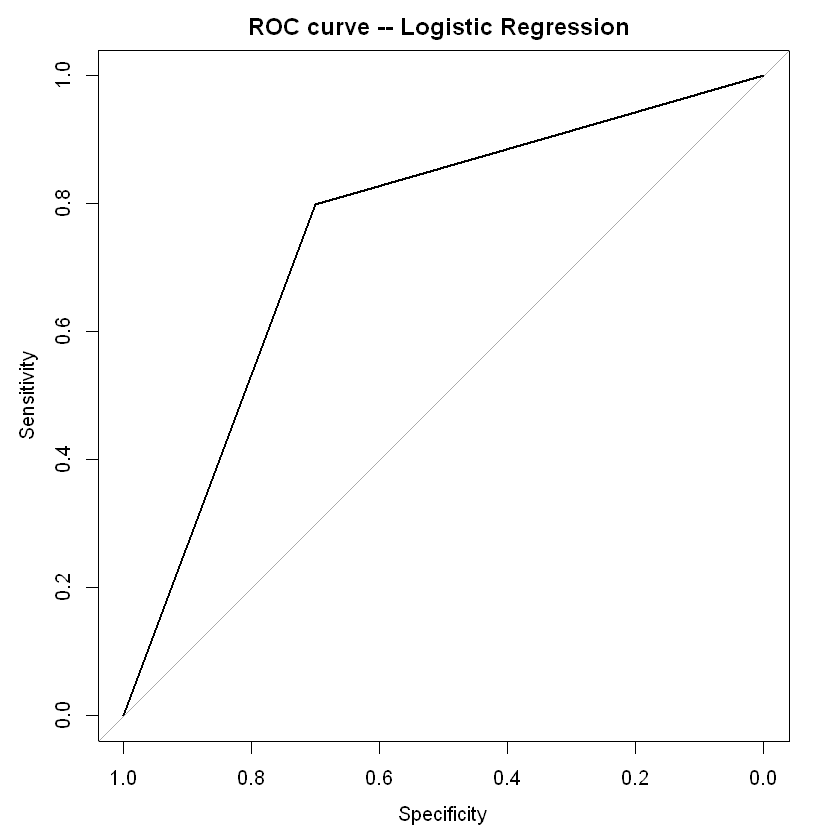


 Metric 4: Goodness-of-fit 
residual: 356228.6 
dof: 349324 
goodness-of-fit: 1.110223e-16
 Metric 5: QQ-norm 


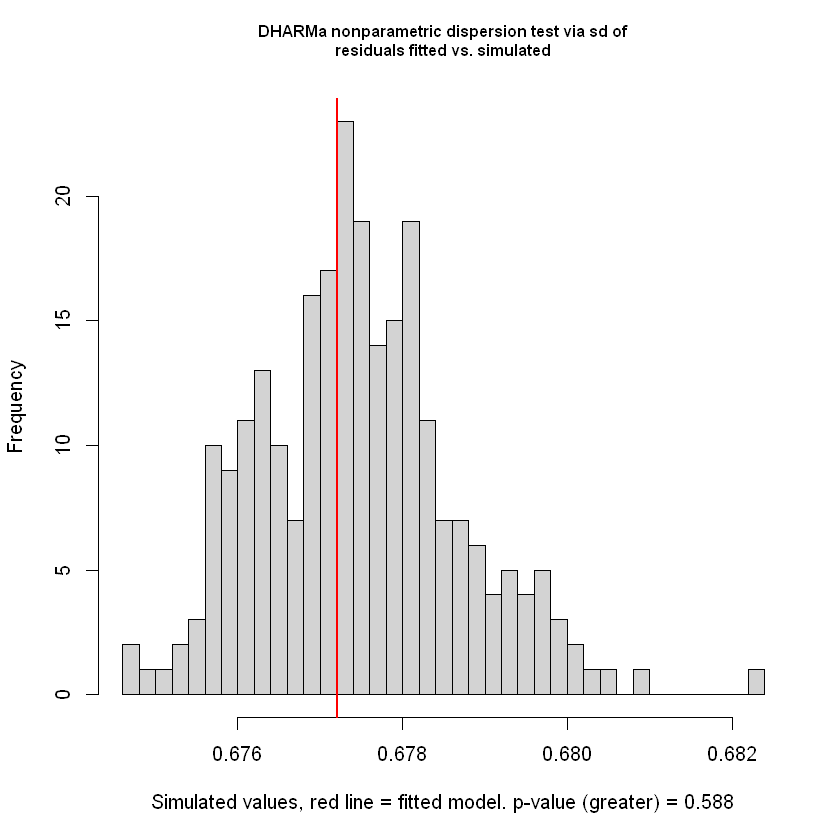

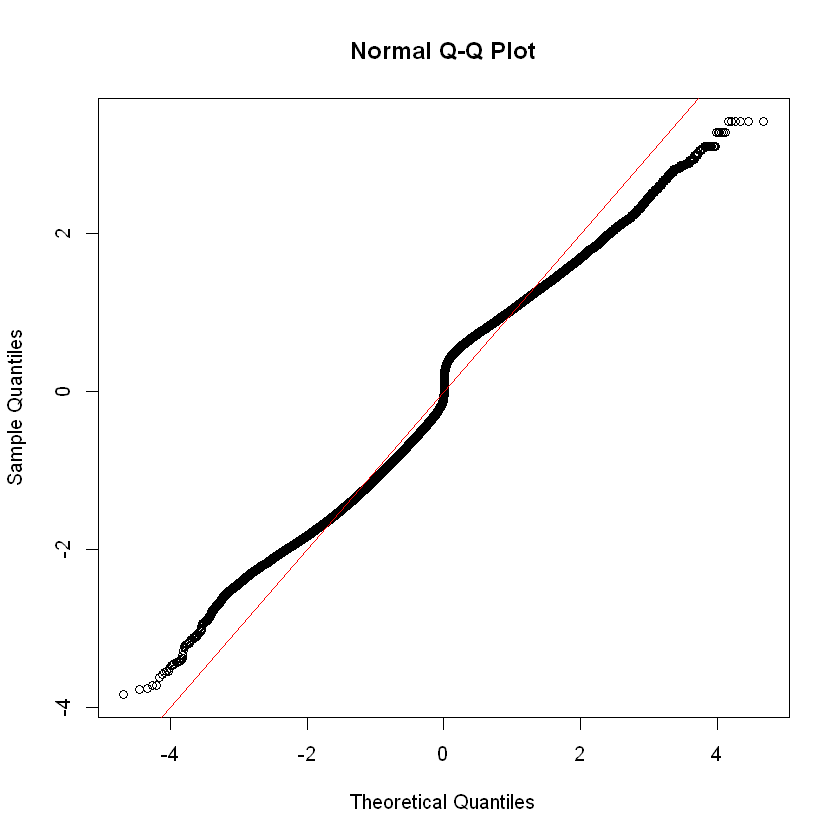

In [616]:
one_for_all_metric(logit_best_bic_model, testing_data, "Diabetes_binary")

## TEST